# Surprise Housing - Advanced Linear Regression for Housing Price Prediction

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market.The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company want to leverage the anaytics and predict the actual value of the prospective properties and decide whether to invest in them or not. 

**Objective**
- To understand which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

**Business Goal** 

Using the predictive model the management wants;
- To understand how exactly the prices vary with the variables. 
- To manipulate the strategy of the firm infering the model and concentrate on areas that will yield high returns. 
- To understand the pricing dynamics of a new market.


**Approach**
- Data understanding 
- Loading the selecting the relevent data for analysis
- Data cleaning - duplicate data and missing values
- EDA - Univariate, Segmented analysis, Bi-variate analysis with Visualization
- Data Preparation - Feature Engineering, Feature Creating, Feature Encoding
- Model development experiments
- Model Selection
- Conclusion

In [1]:
## Importing required pyhton libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

from scipy.stats import pearsonr
from scipy.stats import kstest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

In [2]:
## Setting the display of pandas dataframe to show stated number of rows and columns
## setting default figure size for visualization

pd.options.display.max_rows=100
pd.options.display.max_columns=150
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Data loading and Understanding

In [4]:
## Loading the data from a CSV file and checking the first 5 rows

df = pd.read_csv("train.csv", index_col='Id')
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

In [5]:
## Checking the shape of the data

df.shape

(1460, 80)

In [6]:
## Checking for duplicate data

print(df.duplicated().sum())

0


**Understanding from data**

- data has 80 columns and 1460 rows
    - Column `SalePrice` is the target column, which is continuous 
- From the outset we have continous and categorical columns, among categorical we have nominal and ordinal types
- Some columns have missing values like `Alley`, we will explore in details for missing values
- We can also observe that there are no dulicate records

**Understanding from the data dictionary**
- From data dictionary we understand that, following columns are of Ordinal Category type;
    -  `OverallQual`, `OverallCond`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageFinish`,`GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`,

- From data dictionary we understand that, following columns are of Nominal Category type;
    - `MSSubClass`, `MSZoning`, `Street`, `Alley`, `LotShape`, `LandContour`, `Utilities`, `LotConfig`, `LandSlope`, `Neighborhood`, `Condition1`, `Condition2`, `MasVnrType`,  `BldgType`, `HouseStyle`, `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `Foundation`, `Heating`, `CentralAir`, `Electrical`, `GarageType`, `MiscFeature`

- From data dictionary we understand that, following columns are of continuous/numreical type;
    -  `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinType1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `Bedroom`, `Kitchen`, `TotRmsAbvGrd`, `Fireplaces`, `GarageCars`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, 

- From data dictionary we understand that, following columns represents years will be converted to categories;
    -  `YearBuild`, `YearRemodAdd`, `GarageYrBlt`, `YrSold`, 

- From data dictionary we understand that, some of the categorical columns have ***NA*** has a level, this not to be interpreted as missing values

- From data dictionary we understand that columns like `MoSold`, `YrSold`, `SaleType`, `SaleCondition` are information related to the preious sale details of the property

- We assume that these values does not impact/influence the current sales type or sale condiations and hance we will not consider `MoSold`, `sakesType`, `SaleCondition` these variables in the analysis. However we can use `YrSold` vairable to compute the age of the property at the time of sale

In [7]:
## Droping the irrelevent columns

df = df.drop(columns=['MoSold', 'SaleType', 'SaleCondition'], axis=1)
print(df.shape)
df.head(1)

(1460, 77)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
Id                                                                              
1              1          Gd             8        Typ           0         NaN   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                           
1      Attchd       2003.0          RFn           2         548         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                            
1          TA          Y           0           61              0          0   

    ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  YrSold  SalePrice  
Id                                                                              
1             0         0    NaN   NaN         NaN        0    2008     208500

- We will use 77 columns for further analysis

## Data Cleaning

### Checking and correcting the data types

In [8]:
## Checking the data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- Many featuers are of object category to be converted into appropriate type

Following columns are of Nominal Category type are converted to Categorical Type, dummy variables are created for these columns

`MSSubClass`, `MSZoning`, `Street`, `Alley`, `LotShape`, `LandContour`, `Utilities`, `LotConfig`, `LandSlope`, `Neighborhood`, `Condition1`, `Condition2`, `MasVnrType`,  `BldgType`, `HouseStyle`, `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `Foundation`, `Heating`, `CentralAir`, `Electrical`, `GarageType`, `MiscFeature`

In [9]:
nom_cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                'Neighborhood', 'Condition1', 'Condition2', 'MasVnrType', 'BldgType', 'HouseStyle', 'RoofStyle','RoofMatl', 
                'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature']

In [10]:
## Converting to categorical columns 

df[nom_cat_cols] = df[nom_cat_cols].astype('category')
df[nom_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   MSZoning      1460 non-null   category
 2   Street        1460 non-null   category
 3   Alley         91 non-null     category
 4   LotShape      1460 non-null   category
 5   LandContour   1460 non-null   category
 6   Utilities     1460 non-null   category
 7   LotConfig     1460 non-null   category
 8   LandSlope     1460 non-null   category
 9   Neighborhood  1460 non-null   category
 10  Condition1    1460 non-null   category
 11  Condition2    1460 non-null   category
 12  MasVnrType    1452 non-null   category
 13  BldgType      1460 non-null   category
 14  HouseStyle    1460 non-null   category
 15  RoofStyle     1460 non-null   category
 16  RoofMatl      1460 non-null   category
 17  Exterior1st   1460 non-null   category
 18  Exterior

Following Ordinal Categorical columns are converted to categorical and we will use label encoding for these columns

`OverallQual`, `OverallCond`, `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageFinish`,`GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`,

In [11]:
ord_cat_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 
                'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']

In [12]:
## Converting to categorical columns 

df[ord_cat_cols] = df[ord_cat_cols].astype('category')
df[ord_cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OverallQual   1460 non-null   category
 1   OverallCond   1460 non-null   category
 2   ExterQual     1460 non-null   category
 3   ExterCond     1460 non-null   category
 4   BsmtQual      1423 non-null   category
 5   BsmtCond      1423 non-null   category
 6   BsmtExposure  1422 non-null   category
 7   BsmtFinType1  1423 non-null   category
 8   BsmtFinType2  1422 non-null   category
 9   HeatingQC     1460 non-null   category
 10  KitchenQual   1460 non-null   category
 11  Functional    1460 non-null   category
 12  FireplaceQu   770 non-null    category
 13  GarageFinish  1379 non-null   category
 14  GarageQual    1379 non-null   category
 15  GarageCond    1379 non-null   category
 16  PavedDrive    1460 non-null   category
 17  PoolQC        7 non-null      category
 18  Fence   

In [13]:
## These columns will be converted to Categorical 
## Need them as numerical for futehr feature engineering 
years_col = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'] 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

- All features are assigned the appropriate data types

### Descriptive statistics of numerical columns

In [15]:
## Descriptive statistics of numerical columns

df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95 ])

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1201.000000    1460.000000  1460.000000   1460.000000  1452.000000   
mean     70.049958   10516.828082  1971.267808   1984.865753   103.685262   
std      24.284752    9981.264932    30.202904     20.645407   181.066207   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
10%      44.000000    5000.000000  1924.900000   1950.000000     0.000000   
20%      53.000000    7078.400000  1947.800000   1961.800000     0.000000   
30%      60.000000    8063.700000  1958.000000   1971.000000     0.000000   
40%      63.000000    8793.400000  1965.000000   1980.000000     0.000000   
50%      69.000000    9478.500000  1973.000000   1994.000000     0.000000   
60%      74.000000   10198.200000  1984.000000   1998.000000    16.000000   
70%      79.000000   11066.500000  1997.300000   2002.000000   117.000000   
80%      85.000000   12205.800000  2003.000000   2005.000000   206.000000   
90%      96.000000   14381.700000  2006.000000   2006.000000   335.000000   
95%     107.000000   17401.150000  2007.000000   2007.000000   456.000000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712   
std     456.098091   161.319273   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
10%       0.000000     0.000000    74.900000   636.900000   756.900000   
20%       0.000000     0.000000   172.000000   755.800000   848.000000   
30%       0.000000     0.000000   280.000000   840.000000   915.700000   
40%     218.600000     0.000000   374.600000   910.000000  1000.200000   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000   
60%     525.600000     0.000000   604.400000  1088.000000  1182.000000   
70%     655.000000     0.000000   736.000000  1216.000000  1314.000000   
80%     806.400000     0.000000   896.000000  1391.200000  1482.400000   
90%    1065.500000   117.200000  1232.000000  1602.200000  1680.000000   
95%    1274.000000   396.200000  1468.000000  1753.000000  1831.250000   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean    346.992466      5.844521  1515.463699      0.425342      0.057534   
std     436.528436     48.623081   525.480383      0.518911      0.238753   
min       0.000000      0.000000   334.000000      0.000000      0.000000   
10%       0.000000      0.000000   912.000000      0.000000      0.000000   
20%       0.000000      0.000000  1066.600000      0.000000      0.000000   
30%       0.000000      0.000000  1208.000000      0.000000      0.000000   
40%       0.000000      0.000000  1339.000000      0.000000      0.000000   
50%       0.000000      0.000000  1464.000000      0.000000      0.000000   
60%     455.400000      0.000000  1578.000000      1.000000      0.000000   
70%     672.000000      0.000000  1709.300000      1.000000      0.000000   
80%     796.200000      0.000000  1869.000000      1.000000      0.000000   
90%     954.200000      0.000000  2158.300000      1.000000      0.000000   
95%    1141.050000      0.000000  2466.100000      1.000000      1.000000   
max    2065.000000    572.000000  5642.000000      3.000000      2.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000   

**Observations**
- The range of independent numreical columns varies, will use scalling on these columns
- Some of the values look to have high skewness, extreem values and high cardinality like - `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `LowQualFinSF`,`Fireplaces`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`,  `ScreenPorch`, `PoolArea`, `MiscVal`

In [16]:
## Numerical Columns 

num_cols = df.describe().columns
print(num_cols)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')


### Checking & Treating for Missing Values and 

In [17]:
## Checking missing values by feature

df.isna().sum()*100/df.shape[0]

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

**Observations** 
- At the outset there looks like some features have missing values - `LotFrontage`, `Alley`, `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`,  `MiscFeature`. 

- Some categorical columns has ***NA*** as a level, with a meaning to the data, should not be treated as missing value


In [18]:
## Number of missing values

df['LotFrontage'].isna().sum()

259

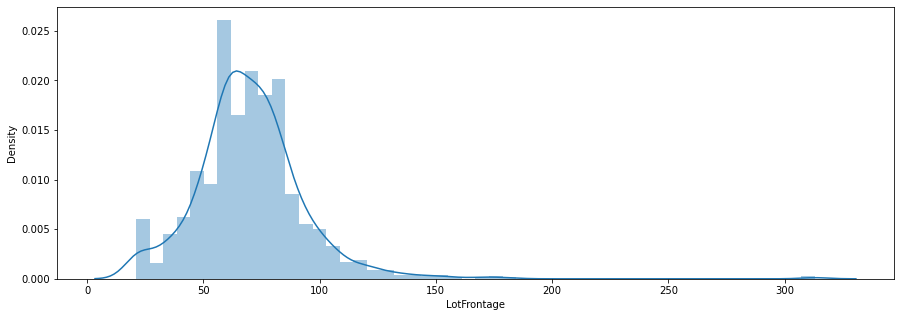

In [19]:
## Checking the distribution of LotFrontage

sns.distplot(df['LotFrontage']);

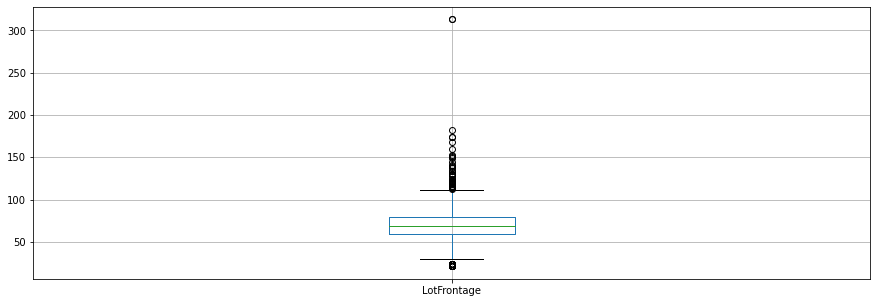

In [20]:
## Box plot to check the extreme/outliers

df[['LotFrontage']].boxplot();

**Observation**
- `LotFrontage` has 17.7% (259) missing value, there are some extreem values
- Hence will use median to impute the missing values

In [21]:
df['LotFrontage'].median()

69.0

In [22]:
## Imputing for the missing values using median 

df['LotFrontage'] = df['LotFrontage'].fillna(np.nanmedian(df['LotFrontage']))
df['LotFrontage'].isna().sum()

0

In [23]:
## Checking for unique values

df['Alley'].unique()

[NaN, 'Grvl', 'Pave']
Categories (2, object): ['Grvl', 'Pave']

**Observation**

- From data dictionary we understand that **NA** for Alley means "No alley access", so NA is not missing value 
- **NA** to be added as a category

In [24]:
## Adding NA as a category

df['Alley'] = df['Alley'].cat.add_categories("NA").fillna("NA")
df['Alley'].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [25]:
## Checking for missing values

print(df['MasVnrType'].isna().sum())
df['MasVnrType'].unique()

8


['BrkFace', 'None', 'Stone', 'BrkCmn', NaN]
Categories (4, object): ['BrkCmn', 'BrkFace', 'None', 'Stone']

In [26]:
## Checking the unique values and count

df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

**Observation**
- There are 8 values missing
- `None` level has highest frequency, will replace the missing values with `None` level

In [27]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isna().sum()

0

In [28]:
## Checking for missing values

df['MasVnrArea'].isna().sum()

8

In [29]:
## Checking for the value of MasVnrType when MasVnrArea is NaN

df[df['MasVnrArea'].isna()][['MasVnrType','MasVnrArea' ]]

MasVnrType  MasVnrArea
Id                         
235        None         NaN
530        None         NaN
651        None         NaN
937        None         NaN
974        None         NaN
978        None         NaN
1244       None         NaN
1279       None         NaN

In [30]:
### frequency of MasVnrArea for MasVnrType = None

df[df['MasVnrType']=='None']['MasVnrArea'].value_counts()

0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

**Observation**
- From data dictionary we understand that column MasVnrArea is related to MasVnrType
- From data we observe that, when MasVnrType = None, the MasVnrArea is most of the times 0
- Hence replace the missing values in MasVnrArea by 0

In [31]:
## Imputing missing value with 0

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MasVnrArea'].isna().sum()

0

In [32]:
## Checking for missing values

df['BsmtQual'].isna().sum()

37

In [33]:
## Checking for uniques values

print(df['BsmtQual'].unique())
df['BsmtQual'].value_counts()

['Gd', 'TA', 'Ex', NaN, 'Fa']
Categories (4, object): ['Ex', 'Fa', 'Gd', 'TA']


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

**Observation**

- For the following variables we understand that, there is a level as **NA**, which means No Basement, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category in the following variables 

- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType1`


In [34]:
## Checking for missing values

Bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' ]
df[Bsmt_cols].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [35]:
## Adding the category 'NA'

df['BsmtQual'] = df['BsmtQual'].cat.add_categories("NA").fillna("NA")
df['BsmtCond'] = df['BsmtCond'].cat.add_categories("NA").fillna("NA")
df['BsmtExposure'] = df['BsmtExposure'].cat.add_categories("NA").fillna("NA")
df['BsmtFinType1'] = df['BsmtFinType1'].cat.add_categories("NA").fillna("NA")
df['BsmtFinType2'] = df['BsmtFinType2'].cat.add_categories("NA").fillna("NA")

print(df[Bsmt_cols].isna().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64


In [36]:
## Checking the missing value

df['Electrical'].isna().sum()

1

In [37]:
## Checking for uniques values

print(df['Electrical'].unique())
df['Electrical'].value_counts()

['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', NaN]
Categories (5, object): ['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr']


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

**Observation**
- There is one missing data, and will impute it by most frequent value - 'SBrkr'

In [38]:
## Imputing missing value with 0

df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Electrical'].isna().sum()

0

In [39]:
## Checking the missing value

print(df['FireplaceQu'].isna().sum())

690


In [40]:
## Checking for unique values and counts

print(df['FireplaceQu'].unique())
print(df['FireplaceQu'].value_counts())

[NaN, 'TA', 'Gd', 'Fa', 'Ex', 'Po']
Categories (5, object): ['Ex', 'Fa', 'Gd', 'Po', 'TA']
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


**Observation**

- We understand that, there is a level as **NA**, which means No Fireplace, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category

In [41]:
## Adding the category 'NA'

df['FireplaceQu'] = df['FireplaceQu'].cat.add_categories("NA").fillna("NA")

print(df['FireplaceQu'].isna().sum())

0


**Observation**

- For the following variables we understand that, there is a level as **NA**, which means No Basement, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category in the following variables 

- `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`

In [42]:
df['GarageYrBlt']

Id
1       2003.0
2       1976.0
3       2001.0
4       1998.0
5       2000.0
         ...  
1456    1999.0
1457    1978.0
1458    1941.0
1459    1950.0
1460    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [43]:
## Adding the category 'NA', for GarageYrBlt will replace the missing value with 0

df['GarageType'] = df['GarageType'].cat.add_categories("NA").fillna("NA")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].cat.add_categories("NA").fillna("NA")
df['GarageQual'] = df['GarageQual'].cat.add_categories("NA").fillna("NA")
df['GarageCond'] = df['GarageCond'].cat.add_categories("NA").fillna("NA")

print(df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isna().sum())

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


**Observation**

- We understand that, there is a level as **NA**, which means No Pool, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category

In [44]:
## Adding the category 'NA'

df['PoolQC'] = df['PoolQC'].cat.add_categories("NA").fillna("NA")
print(df['PoolQC'].isna().sum())

0


**Observation**

- We understand that, there is a level as **NA**, which means No Fence, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category

In [45]:
## Adding the category 'NA'

df['Fence'] = df['Fence'].cat.add_categories("NA").fillna("NA")
print(df['Fence'].isna().sum())

0


**Observation**

- We understand that, there is a level as **NA**, which means None, pandas is considering this as missing value, but not missing values
- Will add **NA** as a category

In [46]:
## Adding the category 'NA'

df['MiscFeature'] = df['MiscFeature'].cat.add_categories("NA").fillna("NA")
print(df['MiscFeature'].isna().sum())

0


In [47]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

**Observation**
- All the missing values are imputed appropriately 
- Some of the missing values are actually not missing values but a category ***NA*** as per the data dictionary, so added the **NA** as a category

## EDA and Visualization
- Univariate analysis, Segmented Analysis of individual feaures with visualization
- Categorical data are evaluated for classwise distribution and using Kolmogorov-SmironV Statistics, which should hel in determining which categories are important and which categories can be clubed, there by reducing the levels in the categorical features
- Segmented and Bivariate analysis of the dependent variable with target variable 
- Multivariate analysis understanding the correlation of numreical dependent variables with target varriable 

In [48]:
## Saparating Independent and dependent variables

X = df.drop(columns=['SalePrice'])
y = df[['SalePrice']]
print(X.shape)
print(y.shape)

(1460, 76)
(1460, 1)


In [49]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                   
1          60       RL         65.0     8450   Pave    NA      Reg   
2          20       RL         80.0     9600   Pave    NA      Reg   
3          60       RL         68.0    11250   Pave    NA      IR1   
4          70       RL         60.0     9550   Pave    NA      IR1   
5          60       RL         84.0    14260   Pave    NA      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
Id                                                                     
1        Norm     1Fam     2Story           7           5       2003   
2        Norm     1Fam     1Story           6           8       1976   
3        Norm     1Fam     2Story           7           5       2001   
4        Norm     1Fam     2Story           7           5       1915   
5        Norm     1Fam     2Story           8           5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1         2         0  

In [50]:
y.head()

SalePrice
Id           
1      208500
2      181500
3      223500
4      140000
5      250000

**Analysing the target veriable**

In [51]:
## Descriptive statistics for SalesPrice

y.describe()

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

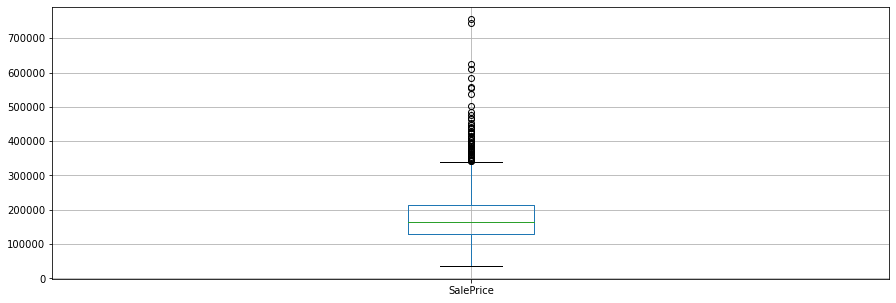

In [52]:
## Boxplot for target variable

y.boxplot();

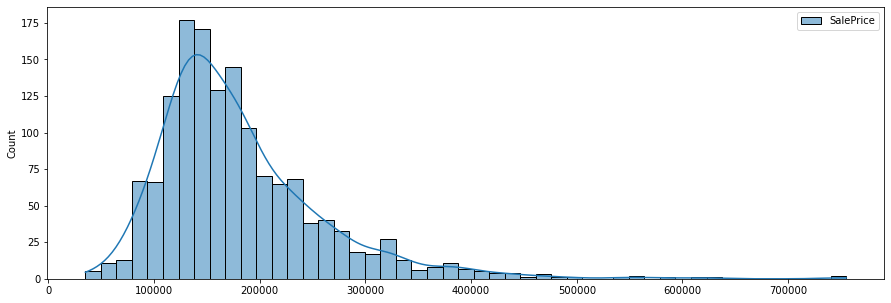

In [53]:
## Distribution plot for target variable

sns.histplot(y, kde=True);

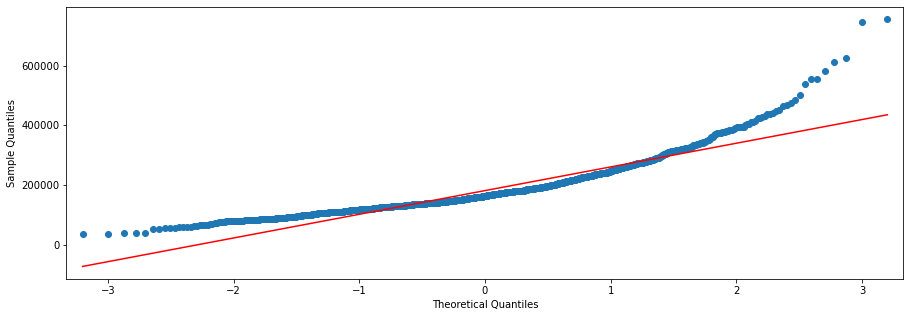

In [54]:
## Checking the normality of the target variable 

qqplot(df['SalePrice'], line='s');

In [55]:
## Computing Upper bound and lowe bound for extracting the outliers

q1 = np.percentile(y, 25)
q3 = np.percentile(y, 75)
iqr = q3-q1

LL = q1 - 1.5*iqr
UL = q3 + 1.5*iqr
print("Limits for detecting outliers")
print("Lower Limit is {} and Upper Limit is {}".format(LL, UL))

Limits for detecting outliers
Lower Limit is 3937.5 and Upper Limit is 340037.5


In [56]:
## Subsetting the outliers from the data

SalePrice_outliers = y[(y.SalePrice<LL) | (y.SalePrice>UL)]
print(SalePrice_outliers.shape)
SalePrice_outliers

(61, 1)


SalePrice
Id             
12       345000
54       385000
59       438780
113      383970
152      372402
162      412500
179      501837
186      475000
225      386250
232      403000
279      415298
310      360000
314      375000
321      342643
322      354000
337      377426
350      437154
379      394432
390      426000
441      555000
474      440000
478      380000
482      374000
497      430000
516      402861
528      446261
586      369900
592      451950
609      359100
643      345000
645      370878
655      350000
662      402000
665      423000
679      372500
689      392000
692      755000
703      361919
719      341000
770      538000
775      395000
799      485000
804      582933
826      385000
878      350000
899      611657
988      395192
991      348000
1047     556581
1143     424870
1170     625000
1182     392500
1183     745000
1229     367294
1244     465000
1268     378500
1269     381000
1354     410000
1374     466500
1389     377500
1438     394617

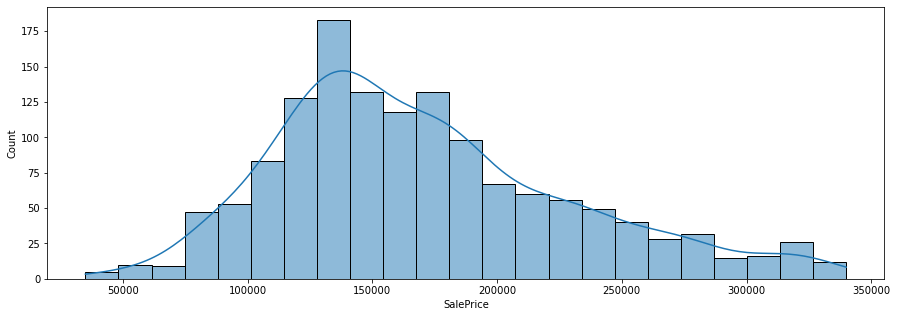

In [57]:
## Distribution plot for target variable after dropping outliers

SalePrice_wo_outliers = y.drop(index = SalePrice_outliers.index)['SalePrice']
sns.histplot(SalePrice_wo_outliers, kde=True);

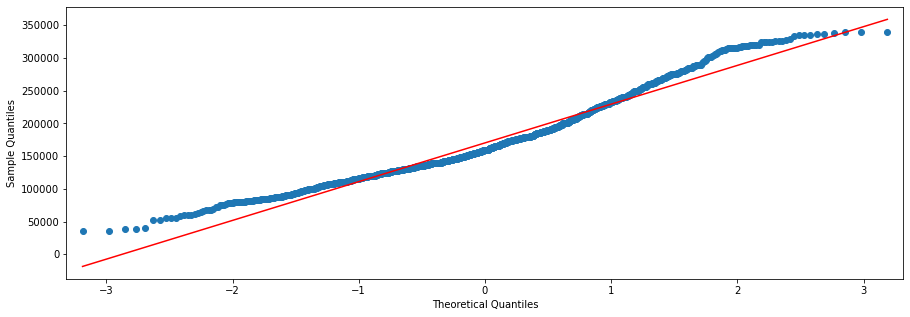

In [58]:
## Checking normality after removing the outliers

qqplot(SalePrice_wo_outliers, line='s');

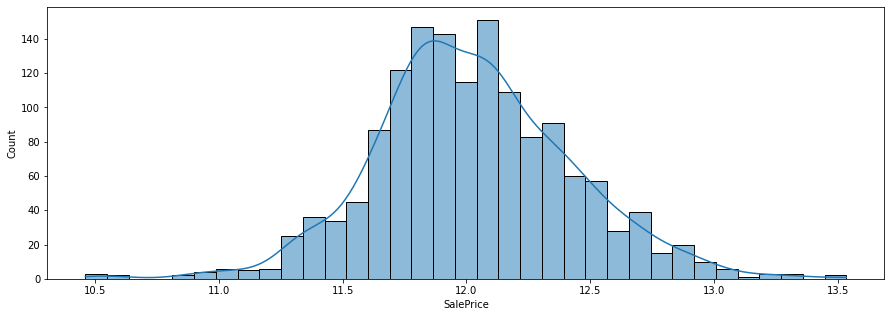

In [59]:
## Applying the log transformation on the SalePrice

sns.histplot(np.log(y.SalePrice), kde=True);

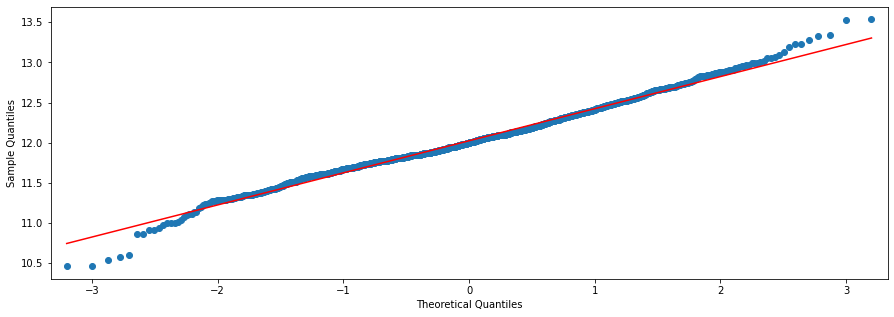

In [60]:
## Checking normality after log transformation

qqplot(np.log(y.SalePrice), line='s');

**Observations**

- `SalePrice` has outliers, there are 61 outliers, which also makes the distribution skewed. 
- We see that SalePrice does not follow normal distribution 
- The upper and lower value houses are deviating, and we can also see that after removing the outliers or using log transformation the SalePRice follows aprox normal distribution
- We can check the following data treatment while building the model;
    - Remove the outliers and build the model
    - log transform the SalePrice

- We will remove the outlier in the SalePrice and use that data for futher analysis

In [61]:
X_woo = X.drop(index = SalePrice_outliers.index)
X_woo.shape

(1399, 76)

In [62]:
y_woo = y.drop(index=SalePrice_outliers.index)
y_woo.shape

(1399, 1)

**Analysing the variable MSSubClass** - Identifies the type of dwelling involved in the sale.

In [63]:
## Unique value count in MSSubClass

X_woo.MSSubClass.value_counts(normalize=True)*100

20     36.240172
60     19.585418
50     10.150107
120     6.075768
30      4.932094
160     4.503217
70      4.217298
80      4.074339
90      3.716941
190     2.144389
85      1.429593
75      1.072194
45      0.857756
180     0.714796
40      0.285919
Name: MSSubClass, dtype: float64

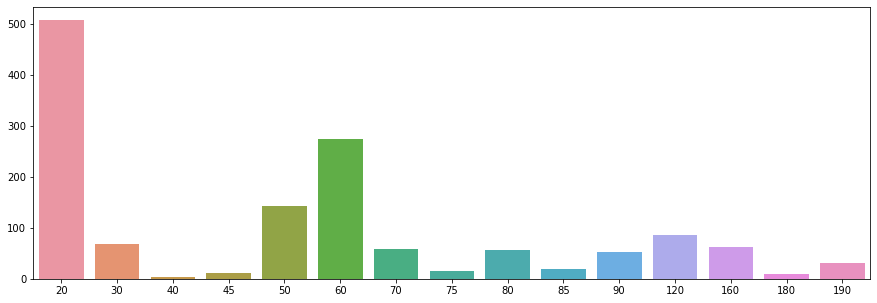

In [64]:
sns.barplot(x = X_woo.MSSubClass.value_counts().index, y=X_woo.MSSubClass.value_counts().values);

In [65]:
## Grouping the median SalePrice by MSSubClass

grouped = y_woo.SalePrice.groupby(by = X_woo.MSSubClass, axis=0 ).median()
grouped.sort_values()

MSSubClass
180     88500.0
30      99900.0
45     107500.0
190    128250.0
50     131250.0
90     135980.0
85     140750.0
40     142500.0
160    146000.0
70     155000.0
20     156000.0
75     163000.0
80     165500.0
120    191000.0
60     211000.0
Name: SalePrice, dtype: float64

In [66]:
## Kolmogorov–Smirnov test  -  https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
## Test answers the question "What is the probability that these two sets of samples were drawn from the same 
## (but unknown) probability distribution?". 
## if p-value from the test is > 0.05, we conclude that two samples are from same distribution (H0)
## we can check the other statistics for these two samples - median and standard deviation or use visualization technique to 
## compbine the samples into one category

def kolmogorov_stat(col_name):
    sub_class = pd.DataFrame(columns=X_woo[col_name].unique())
    lvl_dict = {}
    for lvl in sub_class.columns:
        lvl_dict[lvl] = y_woo[X_woo[col_name]==lvl]['SalePrice'].values
        
    crs_tab = pd.DataFrame(index=lvl_dict.keys(), columns=lvl_dict.keys())
    for key1 in lvl_dict.keys():
        for key2 in lvl_dict.keys():
            stat = kstest(lvl_dict[key1], lvl_dict[key2], alternative='two-sided', mode='auto')
            crs_tab.loc[key1, key2] = stat.pvalue
    
    crs_tab = crs_tab.astype('category')
    plt.figure(figsize=(15, 7))
    sns.heatmap(crs_tab, annot=True);

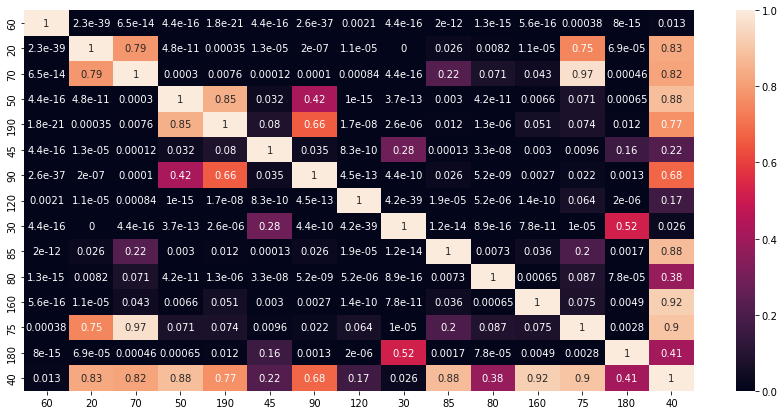

In [67]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('MSSubClass')

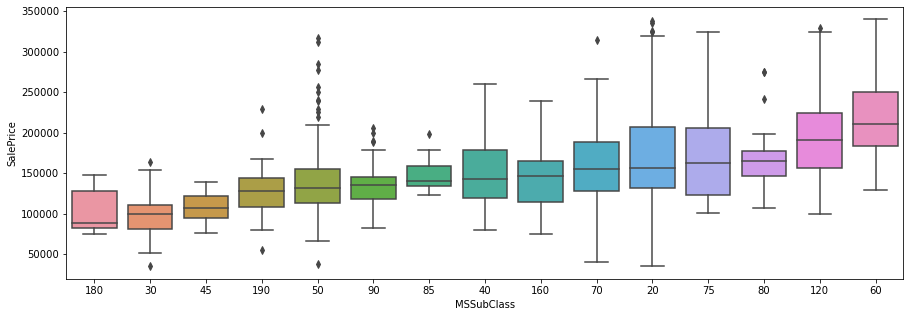

In [68]:
## Ploting the box plot for level in MSSubClass for SalePrice

sns.boxplot(x = X_woo['MSSubClass'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

**Observations**

- MSSubClass has 15 levels/Categories
- Categories "60" and "120" fetches higher saleprice compared to "180", "30", "45" so on.
- some of the levels have very small represntations (<=2%) - 190, 85, 75, 45, 180, 40
- from the Kolmogoro-smirnov test which basically tell if two samples have same distribution, we can use this notion to check what categories can be combined if they have same distribution with respect to SalePrice
- we can also check the box plots for these categories to visualize the median distribution, this also aid in selecting the categories for combining them
- We can obsrve that following categories can be combined 
    - 40 + 160
    - 75 + 70 + 20 + 85
    - 190 + 50 + 90
    - 30 + 180 + 45

In [69]:
## Recategorizing the columns as per above observations

MSSubClass_mod = X_woo['MSSubClass']

MSSubClass_mod = MSSubClass_mod.apply(lambda x: '40-60' if x in [40, 60] else x)
MSSubClass_mod = MSSubClass_mod.apply(lambda x: '20-70-75-85' if x in [75, 70, 20, 85] else x)
MSSubClass_mod = MSSubClass_mod.apply(lambda x: '50-90-190' if x in [50, 90, 190] else x)
MSSubClass_mod = MSSubClass_mod.apply(lambda x: '30-45-180' if x in [30, 45, 180] else x)
MSSubClass_mod.value_counts()

20-70-75-85    601
40-60          278
50-90-190      224
30-45-180       91
120             85
160             63
80              57
Name: MSSubClass, dtype: int64

In [70]:
MSSubClass_mod.head()

Id
1          40-60
2    20-70-75-85
3          40-60
4    20-70-75-85
5          40-60
Name: MSSubClass, dtype: object

**Analysing the variable MSZoning** - Identifies the general zoning classification of the sale.

In [71]:
## Unique value count in MSZoning
# df.MSZoning.value_counts()
X_woo.MSZoning.value_counts(normalize=True)*100

RL         78.127234
RM         15.439600
FV          4.574696
RH          1.143674
C (all)     0.714796
Name: MSZoning, dtype: float64

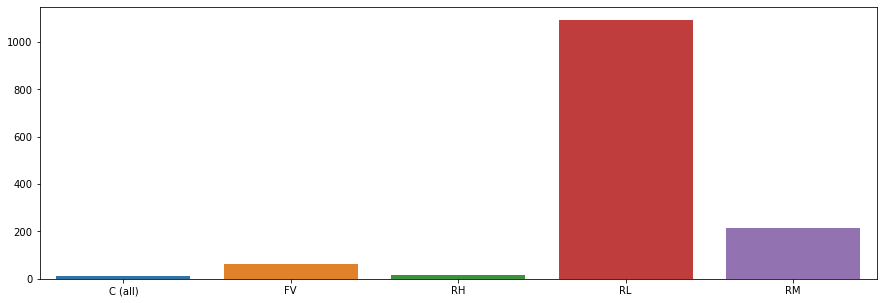

In [72]:
sns.barplot(x = X_woo.MSZoning.value_counts().index, y=X_woo.MSZoning.value_counts().values);

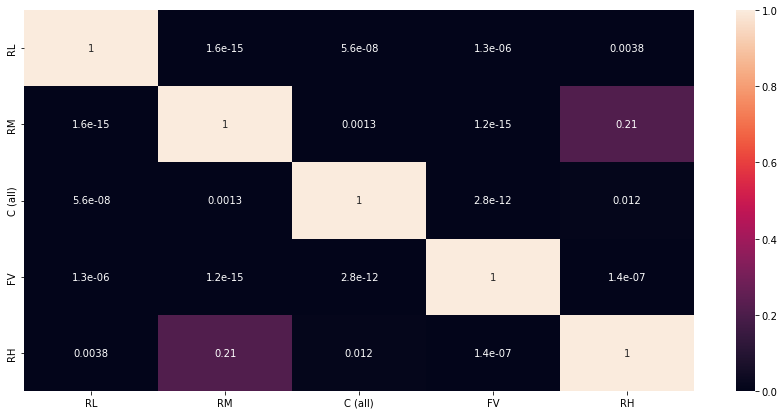

In [73]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('MSZoning')

In [74]:
## Grouping the median SalePrice by MSSubClass

grouped = y.SalePrice.groupby(by = X_woo.MSZoning, axis=0 ).median()
grouped.sort_values()

MSZoning
C (all)     74700.0
RM         120250.0
RH         136500.0
RL         170000.0
FV         202925.0
Name: SalePrice, dtype: float64

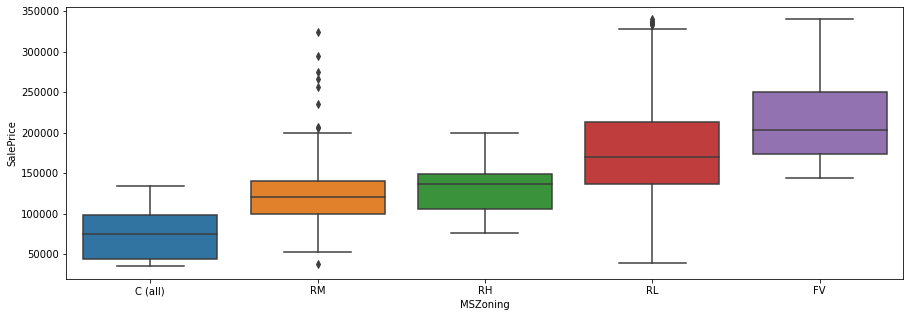

In [75]:
## Ploting the box plot for level in MSSubClass for SalePrice

sns.boxplot(x = X_woo['MSZoning'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

**Observations**

- MSZoning has 5 levels/Categories in the data
- Level "FV", "RL" fetches higher prices
- some of the levels have very small represntations (<=2%) - RH, C(all)
- from the Kolmogoro-smirnov test which basically tell if two samples have same distribution, we can use this notion to check what categories can be combined if they have same distribution with respect to SalePrice
- we can also check the box plots for these categories to visualize the median distribution, this also aid in selecting the categories for combining them
- we can see that category "RM" and "RL" have similar distributions and can be combined

In [76]:
## Recategorizing the columns as per above observations

MSZonins_mod = X_woo['MSZoning']

MSZonins_mod = MSZonins_mod.apply(lambda x: 'RM-RH-C' if x in ['RM', 'RH', "C (all)"] else x)

MSZonins_mod.value_counts()

RL         1093
RM-RH-C     242
FV           64
Name: MSZoning, dtype: int64

**Analysing the variable Street** - Type of road access to property

In [77]:
## Unique value count
X_woo.Street.value_counts(normalize=True)*100

Pave    99.571122
Grvl     0.428878
Name: Street, dtype: float64

In [78]:
X_woo.Street.value_counts()

Pave    1393
Grvl       6
Name: Street, dtype: int64

**Obsrevation**
- The feature "Street" has 2 levels - 'Grvl', 'Pave'
- However the 99.6% of data has only one category 'Pave', this leads to cardinality
- We can drop this variable 

In [79]:
## Droping the variable Street

X_woo.drop(columns=['Street'], inplace=True)
X_woo.shape

(1399, 75)

**Analysing the variable Alley** - Type of alley access to property

In [80]:
## Unique value count
X_woo.Alley.value_counts(normalize=True)*100

NA      93.495354
Grvl     3.573981
Pave     2.930665
Name: Alley, dtype: float64

In [81]:
X_woo.Alley.value_counts()

NA      1308
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [82]:
## Grouping the median SalePrice by Alley

grouped = y_woo.SalePrice.groupby(by = X_woo.Alley, axis=0 ).median()
grouped.sort_values()

Alley
Grvl    119500.0
NA      160000.0
Pave    172500.0
Name: SalePrice, dtype: float64

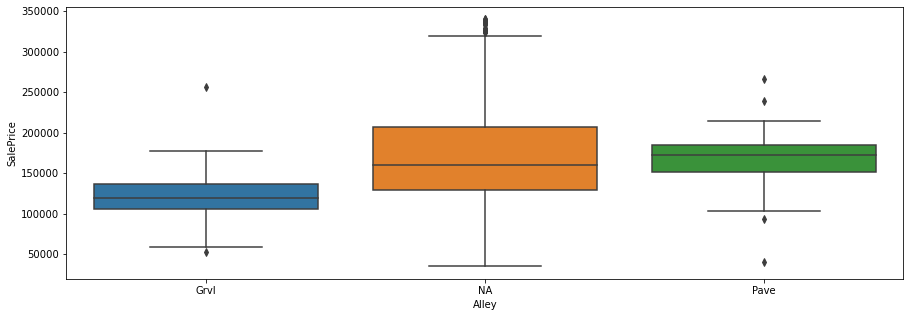

In [83]:
## Ploting the box plot for level in Alley for SalePrice

sns.boxplot(x = X_woo['Alley'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

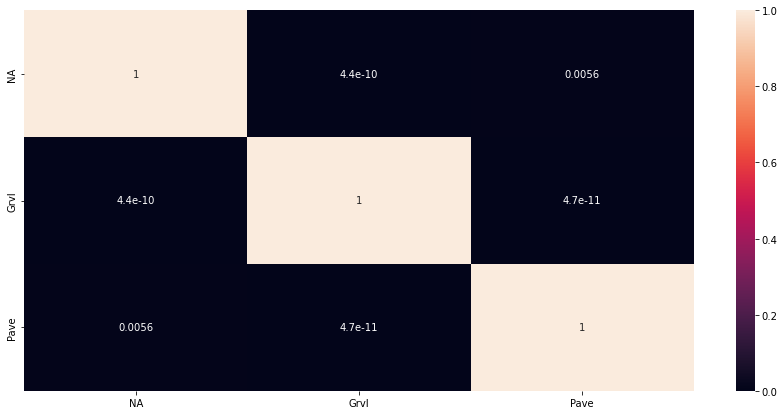

In [84]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('Alley')

**Obsrevation**
- The feature "Alley" has 3 levels - 'Grvl', 'Pave' and "NA" - No ally Access
- However the 93.4% of data has only one category 'NA', this leads to cardinality
- We can also obsrve all the category wise distibution of SalePrice are independent 
- We can drop this variable 

In [85]:
## Droping the variable Alley

X_woo.drop(columns=['Alley'], inplace=True)
X_woo.shape

(1399, 74)

**Analysing the variable LotShape** - General shape of property

In [86]:
## Unique value count
X_woo.LotShape.value_counts(normalize=True)*100

Reg    64.188706
IR1    32.666190
IR2     2.501787
IR3     0.643317
Name: LotShape, dtype: float64

In [87]:
## Grouping the median SalePrice by LotShape

grouped = y_woo.SalePrice.groupby(by = X_woo.LotShape, axis=0 ).median()
grouped.sort_values()

LotShape
Reg    144950.0
IR1    185000.0
IR3    192140.0
IR2    195000.0
Name: SalePrice, dtype: float64

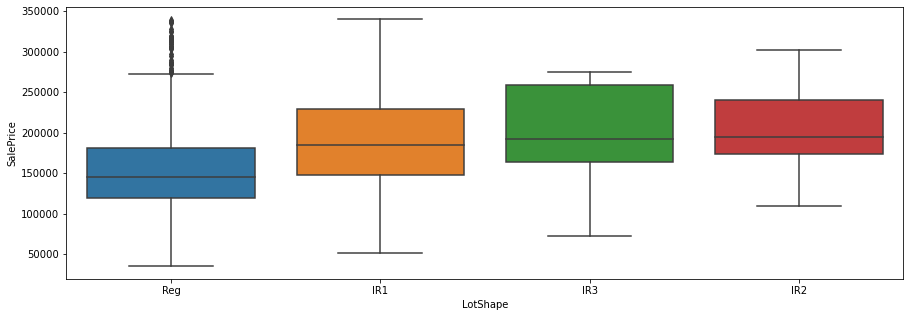

In [88]:
## Ploting the box plot for level in LotShape for SalePrice

sns.boxplot(x = X_woo['LotShape'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

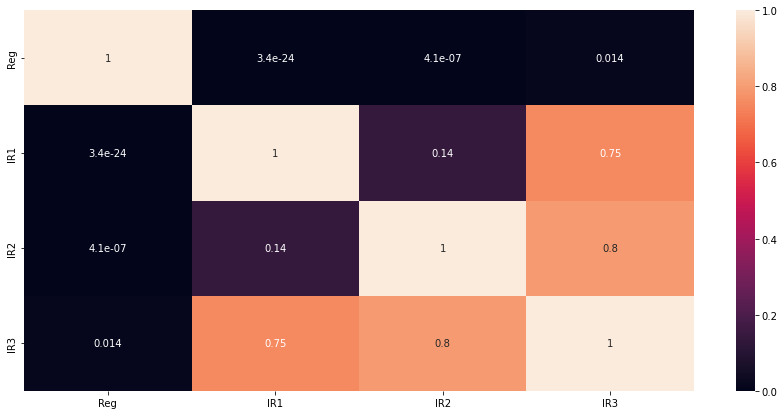

In [89]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('LotShape')

**Obsrevation**
- The feature "LotShape" has 4 levels - 'Reg', 'IR1', 'IR2' and "IR3"
- However the 'IR2' and 'IR3' has very low representations but have higher median values
- We can also obsrve that, 'IR1', 'IR2' and "IR3" has the similar distribution wrt SalePrice (from Kolmogorov–Smirnov test)
- Can condider combining these categories as Regular and Irregular (IR1+IR2+IR3)

In [90]:
## Recategorizing the columns as per above observations

LotShape_mod = X_woo['LotShape']

LotShape_mod = LotShape_mod.apply(lambda x: 'IR1-IR2-IR3' if x in ['IR1', 'IR2', "IR3"] else x)

LotShape_mod.value_counts()

Reg            898
IR1-IR2-IR3    501
Name: LotShape, dtype: int64

**Analysing the variable LandContour** - Flatness of the property

In [91]:
## Unique value count
X_woo.LandContour.value_counts(normalize=True)*100
# df.LandContour.value_counts()

Lvl    90.135811
Bnk     4.503217
HLS     2.930665
Low     2.430307
Name: LandContour, dtype: float64

In [92]:
## Grouping the median SalePrice by LandContour

grouped = y_woo.SalePrice.groupby(by = X_woo.LandContour, axis=0 ).median()
grouped.sort_values()

LandContour
Bnk    139400.0
Lvl    159000.0
HLS    188700.0
Low    188750.0
Name: SalePrice, dtype: float64

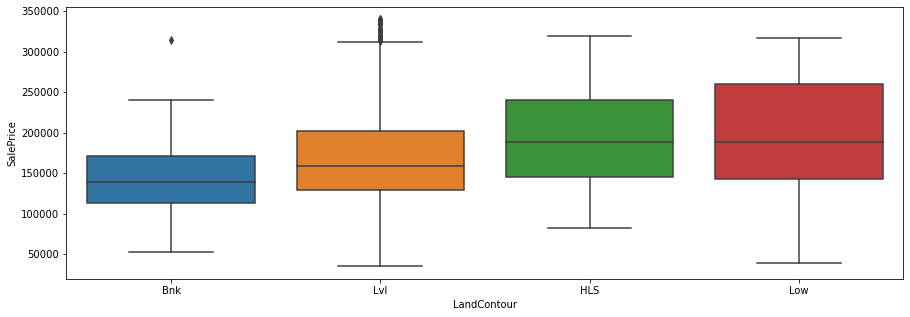

In [93]:
## Ploting the box plot for level in LandContour for SalePrice

sns.boxplot(x = X_woo['LandContour'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

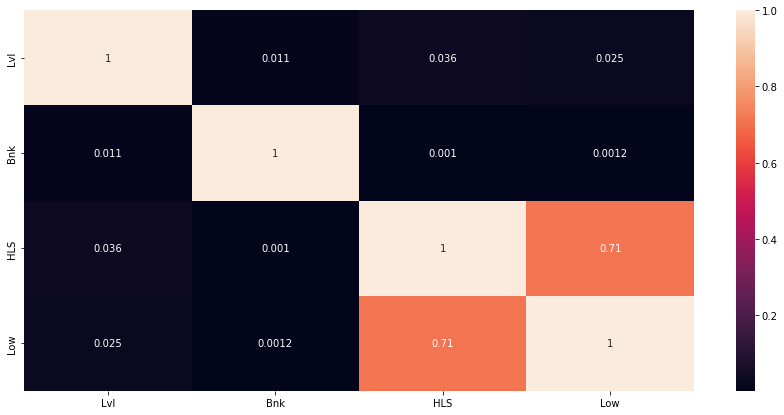

In [94]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('LandContour')

**Obsrevation**
- The feature "LandContour" has 4 levels - 'Lvl', 'Bnk', 'Low' and "HLS"
- However the 'Bnk', 'HLS' and 'Low' has very low representations, however "LOW" and "HLS" have higher median value
- We can also obsrve that, 'Low', and 'HLS' has the similar distribution wrt SalePrice (from Kolmogorov–Smirnov test)
- Can consider combining these categories

In [95]:
## Recategorizing the columns as per above observations

LandContour_mod = X_woo['LandContour']

LandContour_mod = LandContour_mod.apply(lambda x: 'Low-HLS' if x in ['Low', 'HLS'] else x)

LandContour_mod.value_counts()

Lvl        1261
Low-HLS      75
Bnk          63
Name: LandContour, dtype: int64

**Analysing the variable Utilities** -  Type of utilities available 

In [96]:
## Unique value count
X_woo.Utilities.value_counts(normalize=True)*100
# df.Utilities.value_counts()

AllPub    99.92852
NoSeWa     0.07148
Name: Utilities, dtype: float64

In [97]:
## Unique value count
# X.Utilities.value_counts(normalize=True)*100
X_woo.Utilities.value_counts()

AllPub    1398
NoSeWa       1
Name: Utilities, dtype: int64

**Obsrevation**
- The feature "Utilities" has 2 levels - 'AllPub', 'NoSewa'
- However the 'AllPub', level represents 99.9% of data, leading to high cardinality, hence we will drop this variable

In [98]:
## Droping Utilities column 

X_woo.drop(columns=['Utilities'], inplace=True)
X_woo.shape

(1399, 73)

**Analysing the variable LotConfig** - Lot configuration

In [99]:
## Unique value count
X_woo.LotConfig.value_counts(normalize=True)*100
# df.LotConfig.value_counts()

Inside     72.051465
Corner     18.227305
CulDSac     6.147248
FR2         3.288063
FR3         0.285919
Name: LotConfig, dtype: float64

In [100]:
## Grouping the median SalePrice by LotConfig

grouped = y_woo.SalePrice.groupby(by = X_woo.LotConfig, axis=0 ).median()
grouped.sort_values()

LotConfig
Inside     155000.0
Corner     159500.0
FR2        164500.0
CulDSac    192750.0
FR3        195450.0
Name: SalePrice, dtype: float64

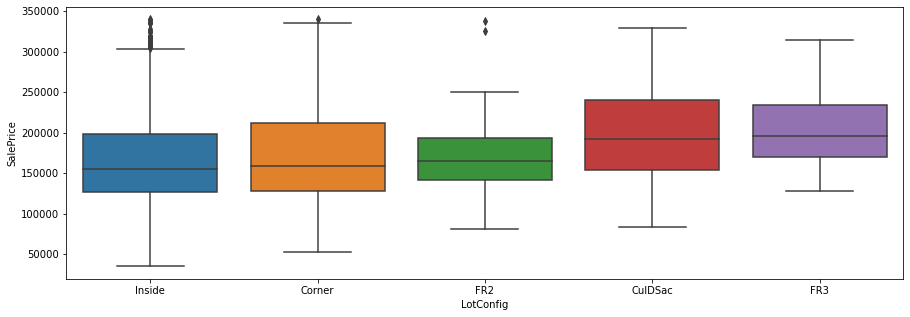

In [101]:
## Ploting the box plot for level in LotConfig for SalePrice

sns.boxplot(x = X_woo['LotConfig'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

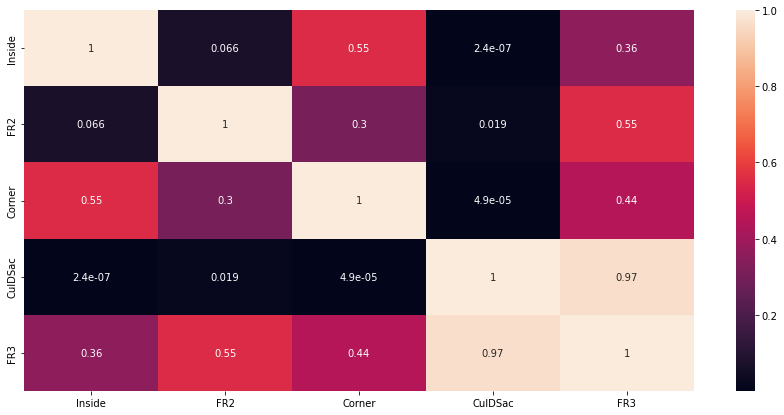

In [102]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('LotConfig')

**Obsrevation**
- The feature "LotConfig" has 5 levels - 'Inside', 'FR2', 'Corner', 'CulDSac' and "FR3"
- However the 'FR2' and 'FR3' has very low representations
- "FR" and "CulDSac" have higher Salesprice median values
- We can also obsrve that, 'CulDSac' and 'FR3' has the similar distribution wrt SalePrice (from Kolmogorov–Smirnov test)
- We can also obsrve that, 'FR2' and 'Corner' has the similar distribution wrt SalePrice (from Kolmogorov–Smirnov test)
- Can consider combining these categories

In [103]:
## Recategorizing the columns as per above observations

LotConfig_mod = X_woo['LotConfig']

LotConfig_mod = LotConfig_mod.apply(lambda x: 'FR3-CulDSac' if x in ['FR3', 'CulDSac'] else x)
LotConfig_mod = LotConfig_mod.apply(lambda x: 'FR2-Corner' if x in ['FR2', 'Corner'] else x)
LotConfig_mod.value_counts()

Inside         1008
FR2-Corner      301
FR3-CulDSac      90
Name: LotConfig, dtype: int64

**Analysing the variable LandSlope** - Slope of property

In [104]:
## Unique value count
X_woo.LandSlope.value_counts(normalize=True)*100
# df.LandSlope.value_counts()

Gtl    94.781987
Mod     4.360257
Sev     0.857756
Name: LandSlope, dtype: float64

In [105]:
X_woo.LandSlope.value_counts()

Gtl    1326
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [106]:
## Grouping the median SalePrice by LandSlope

grouped = y_woo.SalePrice.groupby(by = X_woo.LandSlope, axis=0 ).median()
grouped.sort_values()

LandSlope
Gtl    158250.0
Mod    172000.0
Sev    182500.0
Name: SalePrice, dtype: float64

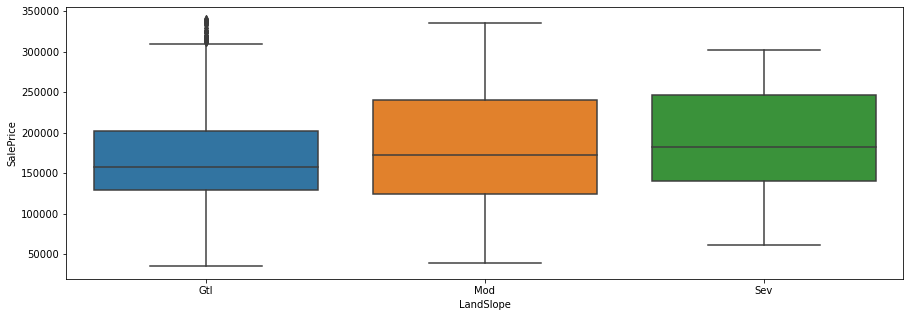

In [107]:
## Ploting the box plot for level in LandSlope for SalePrice

sns.boxplot(x = X_woo['LandSlope'], y = y_woo['SalePrice'], order=grouped.sort_values().index);

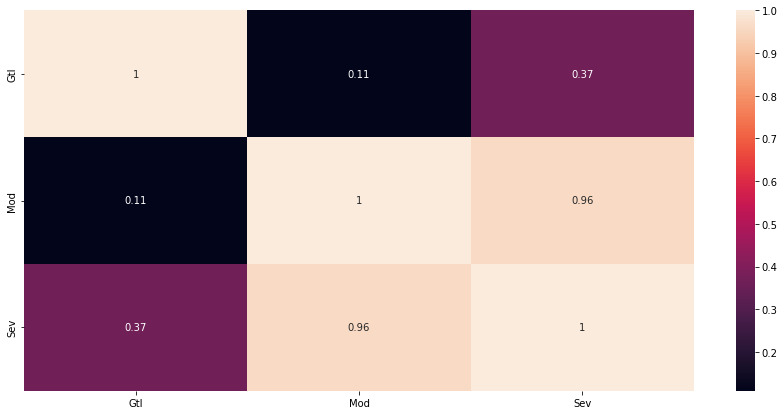

In [108]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('LandSlope')

**Obsrevation**
- The feature "LandSlop" has 3 levels - 'Sev', 'Mod', 'Gtl'
- However the 'Sev' has very low representations and not much deviation in their median values
- We can also obsrve that, 'Sev' and 'Mod' has the similar distribution wrt SalePrice (from Kolmogorov–Smirnov test)
- Can consider combining these categories

In [109]:
## Recategorizing the columns as per above observations

LandSlope_mod = X_woo['LandSlope']

LandSlope_mod = LandSlope_mod.apply(lambda x: 'Mod-Sev' if x in ['Mod', 'Sev'] else x)

LandSlope_mod.value_counts()

Gtl        1326
Mod-Sev      73
Name: LandSlope, dtype: int64

**Analysing the variable Neighborhood** -  Physical locations within Ames city limits

In [110]:
## Unique value count
X_woo.Neighborhood.value_counts(normalize=True)*100
# df.Neighborhood.value_counts()

NAmes      16.011437
CollgCr    10.578985
OldTown     8.005718
Edwards     7.147963
Somerst     6.004289
Gilbert     5.575411
Sawyer      5.289492
NWAmes      5.218013
SawyerW     4.217298
BrkSide     4.145818
NridgHt     3.573981
Mitchel     3.502502
Crawfor     3.431022
IDOTRR      2.644746
Timber      2.501787
NoRidge     2.144389
ClearCr     2.001430
SWISU       1.786991
Blmngtn     1.215154
MeadowV     1.215154
StoneBr     1.143674
BrDale      1.143674
Veenker     0.714796
NPkVill     0.643317
Blueste     0.142959
Name: Neighborhood, dtype: float64

In [111]:
## Grouping the median SalePrice by LandSlope

grouped = y_woo.SalePrice.groupby(by = X_woo.Neighborhood, axis=0 ).median()
grouped.sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    118250.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
Crawfor    195550.0
CollgCr    195950.0
ClearCr    200250.0
Veenker    206000.0
Somerst    223500.0
Timber     224500.0
StoneBr    237750.0
NridgHt    274450.0
NoRidge    282500.0
Name: SalePrice, dtype: float64

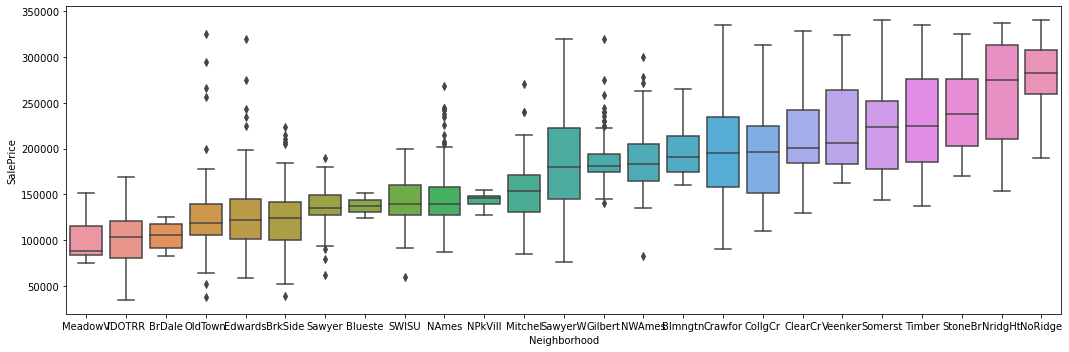

In [112]:
## Ploting the box plot for level in Neighborhood for SalePrice

sns.boxplot(x = X_woo['Neighborhood'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

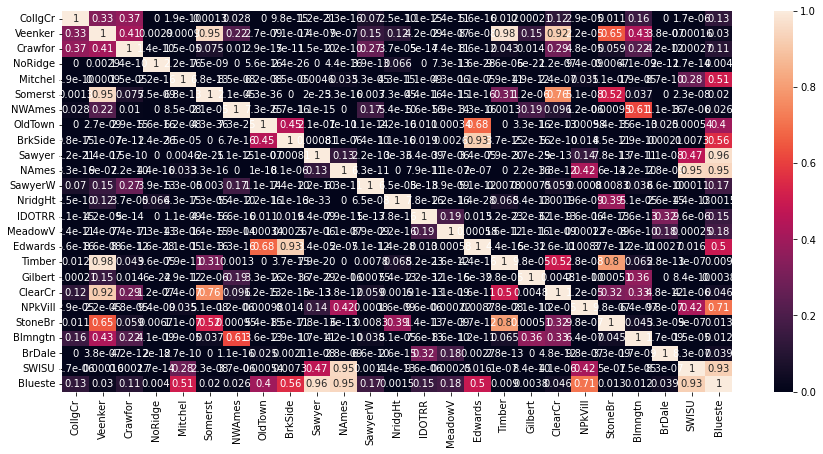

In [113]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('Neighborhood')

**Obsrevation**
- The feature "Neighborhood" has 25 levels
- About 10 categories have less than 2% representation
- Some neighborhoods fetches more value compared to others
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined
- Taking clues from KSStats and BoxPlot, there can be multiple ways we can combine, One such combination can be as follows;
    - Blueste + Swayer + SWISU + NAmes + NPkVill + Mitchel
    - Veenker + Timber + Somerst
    - BrDale + IDOTRR + MeadowV
    - Blmngtn + NWAmes + NridgHt
    - ClearCr + Crawfor + CollgCr
    - BrkSide + Edwards + OldTown
    - StoneBr + NridgHt + NoRidge

In [114]:
X_woo['Neighborhood'].unique().to_list()

['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NAmes',
 'SawyerW',
 'NridgHt',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'ClearCr',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']

In [115]:
## Recategorizing the columns as per above observations

Neighborhood_mod = X_woo['Neighborhood']

Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'Bl-Sa-SW-NW-NP-Mi' if x in ['Blueste', 'Sawyer', 'SWISU', 
                                                                       'NAmes', 'NPkVill', 'Mitchel'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'Ve-Ti-So' if x in ['Veenker', 'Timber', 'Somerst'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'BrD-ID-Me' if x in ['BrDale', 'IDOTRR', 'MeadowV'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'Cl-Cr-Co' if x in ['ClearCr', 'Crawfor', 'CollgCr'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'BrK-Ed-OT' if x in ['BrkSide', 'Edwards', 'OldTown'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'St-Nr-No' if x in ['StoneBr', 'NridgHt', 'NoRidge'] else x)
Neighborhood_mod = Neighborhood_mod.apply(lambda x: 'Bl-NW-Gi' if x in ['Blmngtn', 'NWAmes', 'Gilbert'] else x)
Neighborhood_mod.value_counts()

Bl-Sa-SW-NW-NP-Mi    383
BrK-Ed-OT            270
Cl-Cr-Co             224
Bl-NW-Gi             168
Ve-Ti-So             129
St-Nr-No              96
BrD-ID-Me             70
SawyerW               59
Name: Neighborhood, dtype: int64

**Analysing the variable Condition1** - Proximity to various conditions

In [116]:
## Unique value count
X_woo.Condition1.value_counts(normalize=True)*100

Norm      85.918513
Feedr      5.789850
Artery     3.359543
RRAn       1.786991
PosN       1.286633
RRAe       0.786276
PosA       0.571837
RRNn       0.357398
RRNe       0.142959
Name: Condition1, dtype: float64

In [117]:
X_woo.Condition1.value_counts()

Norm      1202
Feedr       81
Artery      47
RRAn        25
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [118]:
## Grouping the median SalePrice by Condition1

grouped = y_woo.SalePrice.groupby(by = X_woo.Condition1, axis=0 ).median()
grouped.sort_values()

Condition1
Artery    119200.0
Feedr     140000.0
RRAe      142500.0
Norm      162900.0
RRAn      169990.0
RRNe      190750.0
PosN      198750.0
PosA      212500.0
RRNn      214000.0
Name: SalePrice, dtype: float64

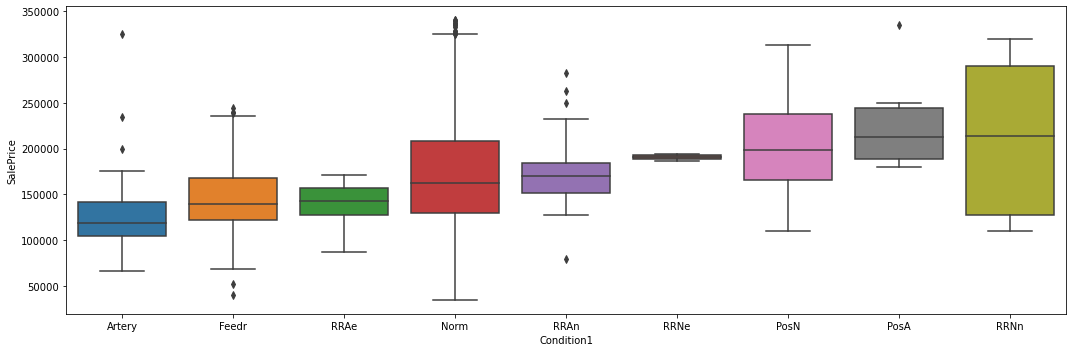

In [119]:
## Ploting the box plot for level in Condition1 for SalePrice

sns.boxplot(x = X_woo['Condition1'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

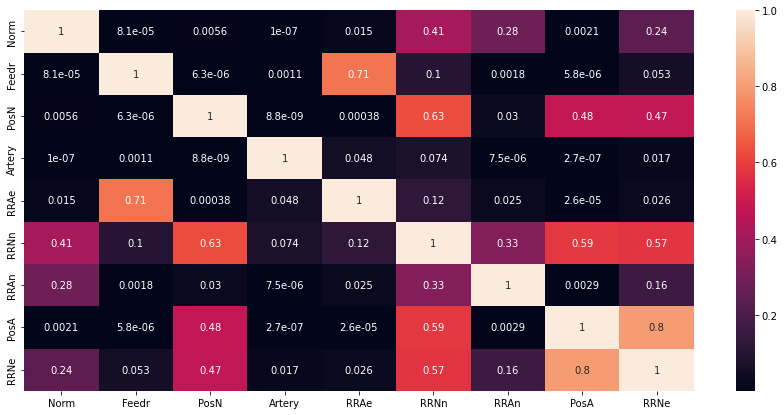

In [120]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('Condition1')

**Obsrevation**
- The feature "Condition1" has 9 levels
- About 6 categories have less than 2% representation
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined
- Taking clues from KSStats and BoxPlot, there can be multiple ways we can combine, One such combination can be as follows;
    - PosN + PosA + RRNn + RRNe
    - Feedr + RRAe
- Another approach could be we can combine all the minority classes as Other class vs Normal class

In [121]:
## Recategorizing the columns as per above observations

Condition1_mod = X_woo['Condition1']

Condition1_mod = Condition1_mod.apply(lambda x: 'PosN-PosA-RRNn-RRNe' if x in ['PosN', 'PosA', 'RRNn', 'RRNe'] else x)
Condition1_mod = Condition1_mod.apply(lambda x: 'Feedr-RRAe' if x in ['Feedr', 'RRAe'] else x)

Condition1_mod.value_counts()

Norm                   1202
Feedr-RRAe               92
Artery                   47
PosN-PosA-RRNn-RRNe      33
RRAn                     25
Name: Condition1, dtype: int64

**Analysing the variable Condition2**  Proximity to various conditions (if more than one is present)

In [122]:
## Unique value count
X_woo.Condition2.value_counts(normalize=True)*100

Norm      98.999285
Feedr      0.428878
Artery     0.142959
RRNn       0.142959
PosA       0.071480
PosN       0.071480
RRAe       0.071480
RRAn       0.071480
Name: Condition2, dtype: float64

In [123]:
X_woo.Condition2.value_counts()

Norm      1385
Feedr        6
Artery       2
RRNn         2
PosA         1
PosN         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

**Obsrevation**
- The feature "Condition2" has 9 levels
- However only one level has 99% of representation, leading to high cardinality, hence droped

In [124]:
## Droping 'Condition2' column
 
X_woo.drop(columns=['Condition2'], inplace=True)
X_woo.shape

(1399, 72)

**Analysing the variable BldgType** Type of dwelling

In [125]:
## Unique value count
X_woo.BldgType.value_counts(normalize=True)*100

1Fam      82.987848
TwnhsE     8.005718
Duplex     3.716941
Twnhs      3.073624
2fmCon     2.215868
Name: BldgType, dtype: float64

In [126]:
## Grouping the median SalePrice by BldgType

grouped = y_woo.SalePrice.groupby(by = X_woo.BldgType, axis=0 ).median()
grouped.sort_values()

BldgType
2fmCon    127500.0
Duplex    135980.0
Twnhs     137500.0
1Fam      163500.0
TwnhsE    171825.0
Name: SalePrice, dtype: float64

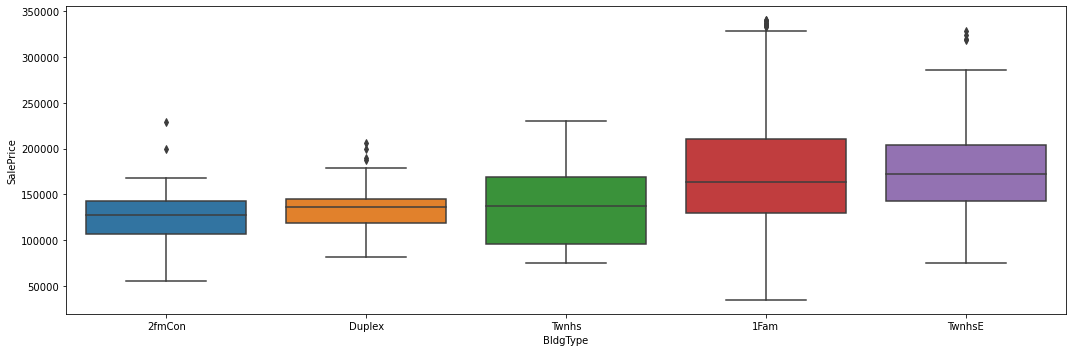

In [127]:
## Ploting the box plot for level in BldgType for SalePrice

sns.boxplot(x = X_woo['BldgType'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

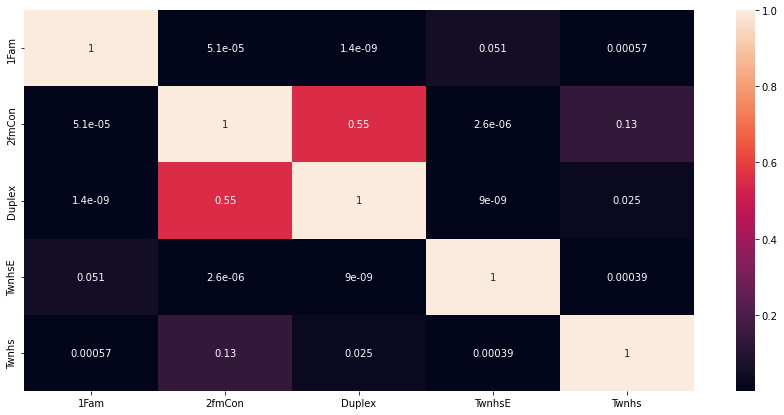

In [128]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('BldgType')

**Obsrevation**
- The feature "BldgType" has 5 levels
- '1Fam' constitue 83.5% data
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined
- Taking clues from KSStats and BoxPlot, there can be multiple ways we can combine, One such combination can be as follows;
    - 'Duplex' + 2fmCon
- Another approach could be we can combine all the minority classes as Others

In [129]:
## Recategorizing the columns as per above observations

BldgType_mod = X_woo['BldgType']

BldgType_mod = BldgType_mod.apply(lambda x: 'Duplex-2fmCon' if x in ['Duplex', '2fmCon'] else x)

BldgType_mod.value_counts()

1Fam             1161
TwnhsE            112
Duplex-2fmCon      83
Twnhs              43
Name: BldgType, dtype: int64

**Analysing the variable HouseStyle** - Style of dwelling

In [130]:
## Unique value count
X_woo.HouseStyle.value_counts(normalize=True)*100

1Story    49.678342
2Story    29.949964
1.5Fin    10.864904
SLvl       4.574696
SFoyer     2.644746
1.5Unf     1.000715
2.5Unf     0.786276
2.5Fin     0.500357
Name: HouseStyle, dtype: float64

In [131]:
## Grouping the median SalePrice by HouseStyle

grouped = y_woo.SalePrice.groupby(by = X_woo.HouseStyle, axis=0 ).median()
grouped.sort_values()

HouseStyle
1.5Unf    111250.0
1.5Fin    131250.0
2.5Unf    133900.0
SFoyer    135960.0
1Story    151000.0
SLvl      164200.0
2Story    187500.0
2.5Fin    191000.0
Name: SalePrice, dtype: float64

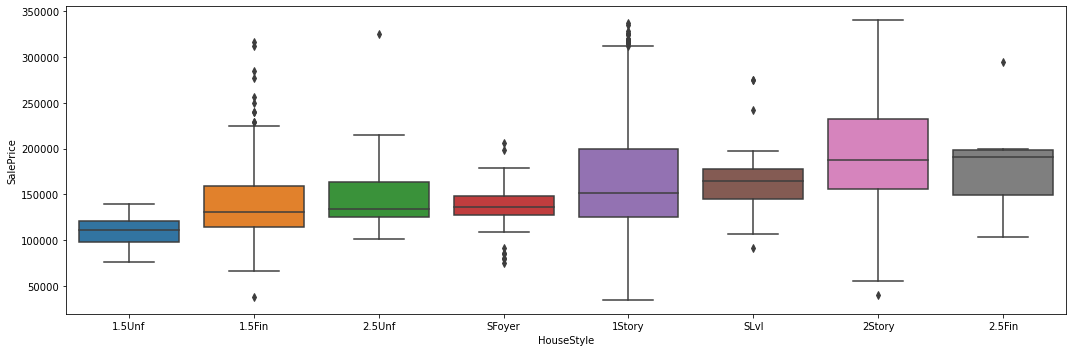

In [132]:
## Ploting the box plot for level in HouseStyle for SalePrice

sns.boxplot(x = X_woo['HouseStyle'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

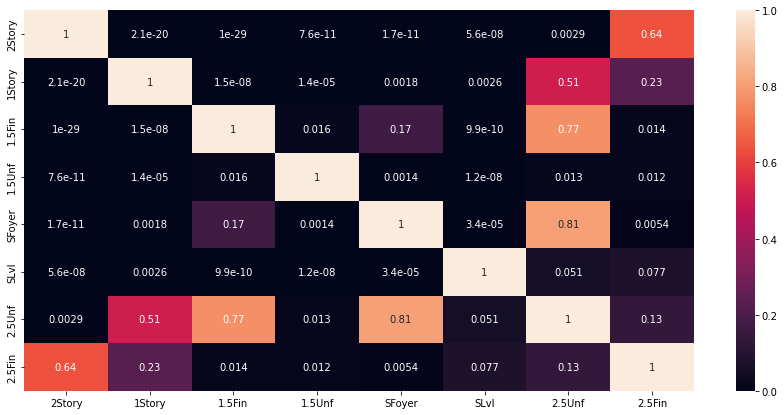

In [133]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('HouseStyle')

**Obsrevation**
- The feature "HouseStyle" has 8 levels
- 4 levels have less than 2% of data 
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined
- Taking clues from KSStats and BoxPlot, there can be multiple ways we can combine, One such combination can be as follows;
    - 2Story + 2.5Fin
    - 1.5Fin + 2.5Unf + SFoyer
    - 
- Another approach could be we can combine all the minority classes as Others

In [134]:
## Recategorizing the columns as per above observations

HouseStyle_mod = X_woo['HouseStyle']

HouseStyle_mod = HouseStyle_mod.apply(lambda x: '2Story-2.5Fin' if x in ['2Story', '2.5Fin'] else x)
HouseStyle_mod = HouseStyle_mod.apply(lambda x: '1.5Fin-2.5Unf-SFoyer' if x in ['1.5Fin', '2.5Unf', 'SFoyer'] else x)
HouseStyle_mod.value_counts()

1Story                  695
2Story-2.5Fin           426
1.5Fin-2.5Unf-SFoyer    200
SLvl                     64
1.5Unf                   14
Name: HouseStyle, dtype: int64

**Analysing the variable RoofStyle** Type of roof

In [135]:
## Unique value count
X_woo.RoofStyle.value_counts(normalize=True)*100

Gable      79.985704
Hip        17.655468
Flat        0.929235
Gambrel     0.786276
Mansard     0.500357
Shed        0.142959
Name: RoofStyle, dtype: float64

In [136]:
## Grouping the median SalePrice by RoofStyle

grouped = y_woo.SalePrice.groupby(by = X_woo.RoofStyle, axis=0 ).median()
grouped.sort_values()

RoofStyle
Gambrel    139000.0
Gable      158000.0
Hip        161000.0
Mansard    175000.0
Flat       185000.0
Shed       225000.0
Name: SalePrice, dtype: float64

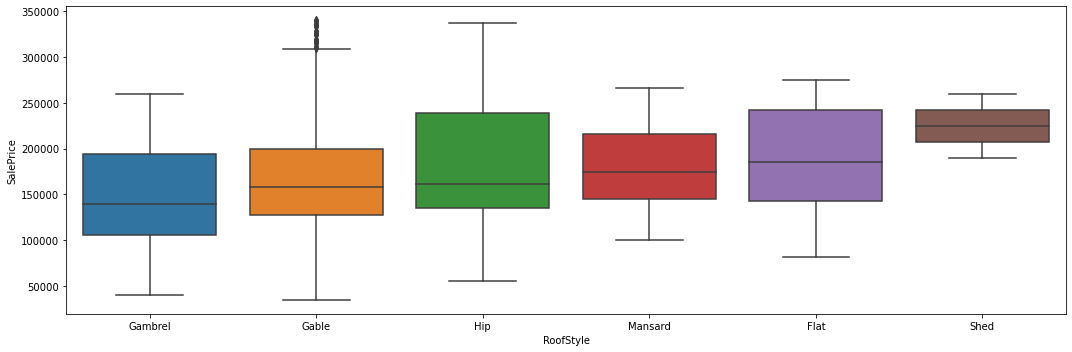

In [137]:
## Ploting the box plot for level in RoofStyle for SalePrice

sns.boxplot(x = X_woo['RoofStyle'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

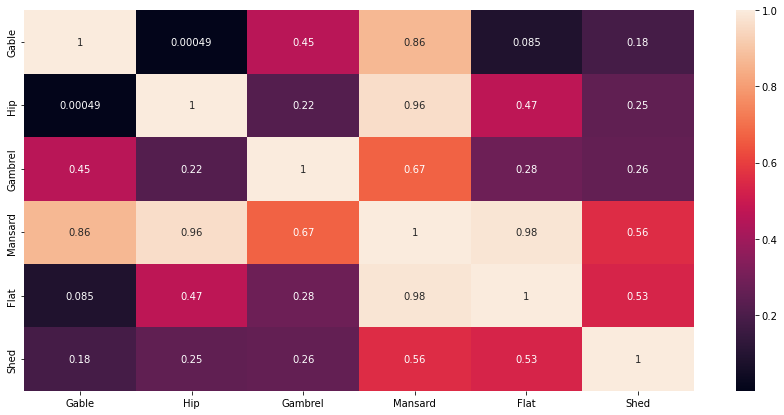

In [138]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('RoofStyle')

**Obsrevation**
- The feature "RoofStyle" has 6 levels
- 4 levels have less than 2% of data 
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined
- We will combine all the minority classes as Others Vs Gable

In [139]:
## Recategorizing the columns as per above observations

RoofStyle_mod = X_woo['RoofStyle']

RoofStyle_mod = RoofStyle_mod.apply(lambda x: 'Others' if x in ['Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'] else x)

RoofStyle_mod.value_counts()

Gable     1119
Others     280
Name: RoofStyle, dtype: int64

**Analysing the variable RoofMatl**  Roof material

In [140]:
## Unique value count
X_woo.RoofMatl.value_counts(normalize=True)*100

CompShg    98.355969
Tar&Grv     0.786276
WdShake     0.357398
WdShngl     0.214439
ClyTile     0.071480
Membran     0.071480
Metal       0.071480
Roll        0.071480
Name: RoofMatl, dtype: float64

In [141]:
X_woo.RoofMatl.value_counts()

CompShg    1376
Tar&Grv      11
WdShake       5
WdShngl       3
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [142]:
## Grouping the median SalePrice by RoofMatl

grouped = y_woo.SalePrice.groupby(by = X_woo.RoofMatl, axis=0 ).median()
grouped.sort_values()

RoofMatl
Roll       137000.0
CompShg    158950.0
ClyTile    160000.0
Tar&Grv    167000.0
Metal      180000.0
Membran    241500.0
WdShake    242000.0
WdShngl    278000.0
Name: SalePrice, dtype: float64

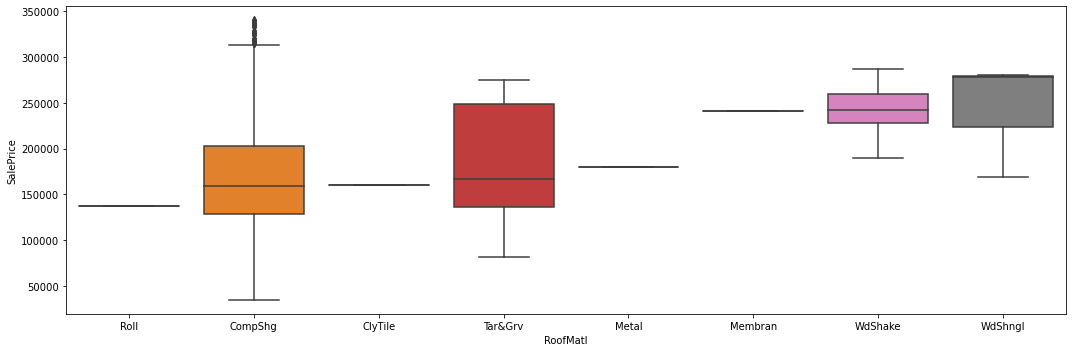

In [143]:
## Ploting the box plot for level in RoofMatl for SalePrice

sns.boxplot(x = X_woo['RoofMatl'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

**Obsrevation**
- The feature "RoofMatl" has 8 levels
- 'CompShd' levels have more than 98% of data, this leads to high cardinality, we will drop this variable

In [144]:
## Droping the variable "RoofMatl"

X_woo.drop(columns=['RoofMatl'], inplace=True)
X_woo.shape

(1399, 71)

**Analysing the variable Exterior1st** - Exterior covering on house

In [145]:
## Unique value count
X_woo.Exterior1st.value_counts(normalize=True)*100

VinylSd    34.238742
HdBoard    15.725518
MetalSd    15.511079
Wd Sdng    14.510365
Plywood     7.648320
CemntBd     3.716941
BrkFace     3.359543
WdShing     1.715511
Stucco      1.644031
AsbShng     1.429593
BrkComm     0.142959
Stone       0.142959
AsphShn     0.071480
CBlock      0.071480
ImStucc     0.071480
Name: Exterior1st, dtype: float64

In [146]:
X_woo.Exterior1st.value_counts()

VinylSd    479
HdBoard    220
MetalSd    217
Wd Sdng    203
Plywood    107
CemntBd     52
BrkFace     47
WdShing     24
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

In [147]:
## Grouping the median SalePrice by Exterior1st

grouped = y_woo.SalePrice.groupby(by = X_woo.Exterior1st, axis=0 ).median()
grouped.sort_values()

Exterior1st
BrkComm     71000.0
AsphShn    100000.0
CBlock     105000.0
AsbShng    108000.0
WdShing    123750.0
Wd Sdng    137900.0
MetalSd    138500.0
Stucco     140000.0
HdBoard    149700.0
BrkFace    161500.0
Plywood    167000.0
VinylSd    193879.0
CemntBd    209725.0
Stone      258500.0
ImStucc    262000.0
Name: SalePrice, dtype: float64

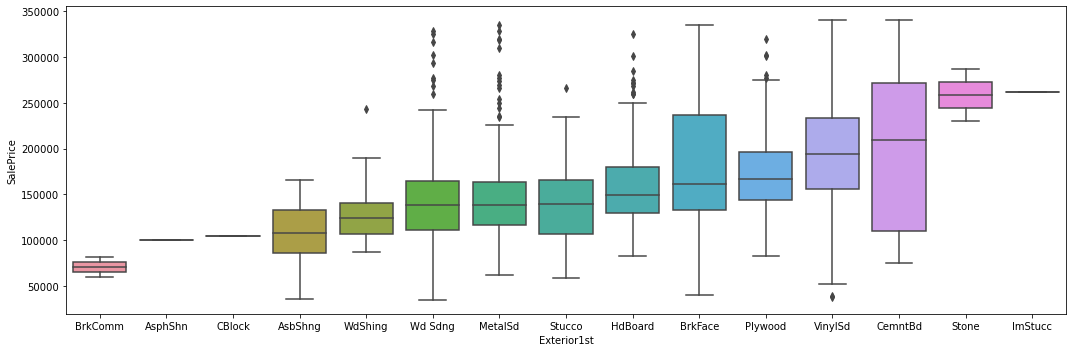

In [148]:
## Ploting the box plot for level in Exterior1st for SalePrice

sns.boxplot(x = X_woo['Exterior1st'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

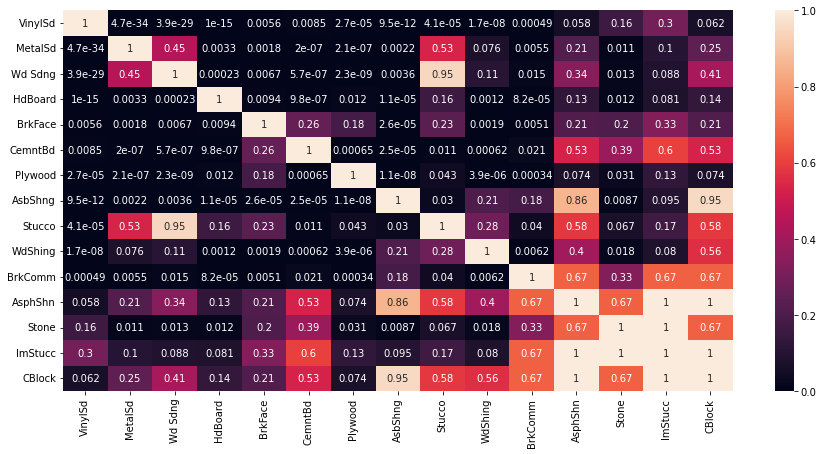

In [149]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('Exterior1st')

**Obsrevation**
- The feature "Exterior1st" has 15 levels
- 8 levels have less than 2% of data 
- These minority categories can be conmbied, we can take help of Kolmogorov–Smirnov p-value to check which of these categories can be combined

In [150]:
## Recategorizing the columns as per above observations

Exterior1st_mod = X_woo['Exterior1st']

Exterior1st_mod = Exterior1st_mod.apply(lambda x: 'Wd S-MS-St' if x in ['Wd Sdng', 'MetalSd', 'Stucco'] else x)
Exterior1st_mod = Exterior1st_mod.apply(lambda x: 'WdS-AspS-CB-AsbS-BrkC' if x in ['WdShing','AsphShn', 
                                                                               'CBlock', 'AsbShng', 'BrkComm'] else x)
Exterior1st_mod = Exterior1st_mod.apply(lambda x: 'St-Im-CeB' if x in ['Stone', 'ImStucc', 'CemntBd'] else x)
Exterior1st_mod.value_counts()

VinylSd                  479
Wd S-MS-St               443
HdBoard                  220
Plywood                  107
St-Im-CeB                 55
WdS-AspS-CB-AsbS-BrkC     48
BrkFace                   47
Name: Exterior1st, dtype: int64

**Analysing the variable Exterior2nd** Exterior covering on house (if more than one material)

In [151]:
## Unique value count
X_woo.Exterior2nd.value_counts(normalize=True)*100

VinylSd    33.452466
MetalSd    15.082202
HdBoard    14.653324
Wd Sdng    13.867048
Plywood    10.150107
CmentBd     3.645461
Wd Shng     2.501787
Stucco      1.786991
BrkFace     1.644031
AsbShng     1.429593
ImStucc     0.571837
Brk Cmn     0.500357
Stone       0.357398
AsphShn     0.214439
CBlock      0.071480
Other       0.071480
Name: Exterior2nd, dtype: float64

In [152]:
pd.crosstab(index=X_woo['Exterior1st'], columns=X_woo['Exterior2nd'])

Exterior2nd  AsbShng  AsphShn  Brk Cmn  BrkFace  CBlock  CmentBd  HdBoard  \
Exterior1st                                                                 
AsbShng           17        0        0        0       0        0        0   
AsphShn            0        1        0        0       0        0        0   
BrkComm            0        0        2        0       0        0        0   
BrkFace            1        0        0       22       0        0        3   
CBlock             0        0        0        0       1        0        0   
CemntBd            0        0        0        0       0       51        0   
HdBoard            0        1        0        0       0        0      191   
ImStucc            0        0        0        0       0        0        0   
MetalSd            0        1        0        0       0        0        3   
Plywood            0        0        5        0       0        0        2   
Stone              0        0        0        0       0        0        1   
Stucco             0        0        0        0       0        0        0   
VinylSd            1        0        0        0       0        0        1   
Wd Sdng            1        0        0        1       0        0        2   
WdShing            0        0        0        0       0        0        2   

Exterior2nd  ImStucc  MetalSd  Other  Plywood  Stone  Stucco  VinylSd  \
Exterior1st                                                             
AsbShng            0        0      0        2      0       1        0   
AsphShn            0        0      0        0      0       0        0   
BrkComm            0        0      0        0      0       0        0   
BrkFace            0        0      0        6      2       1        0   
CBlock             0        0      0        0      0       0        0   
CemntBd            0        0      0        0      0       0        0   
HdBoard            2        1      0       23      0       0        0   
ImStucc            1        0      0        0      0       0        0   
MetalSd            0      209      0        0      0       1        0   
Plywood            3        0      0       96      0       0        0   
Stone              0        0      0        0      1       0        0   
Stucco             0        0      0        0      1      19        0   
VinylSd            1        0      1        2      0       1      466   
Wd Sdng            1        1      0        8      1       1        2   
WdShing            0        0      0        5      0       1        0   

Exterior2nd  Wd Sdng  Wd Shng  
Exterior1st                    
AsbShng            0        0  
AsphShn            0        0  
BrkComm            0        0  
BrkFace           11        1  
CBlock             0        0  
CemntBd            1        0  
HdBoard            1        1  
ImStucc            0        0  
MetalSd            2        1  
Plywood            1        0  
Stone              0        0  
Stucco             0        3  
VinylSd            1        5  
Wd Sdng          176        9  
WdShing            1       15

**Observations**
- From the corss tabulation of 'Exterior1st' and 'Exterior2nd', we observe that both variable are almost identical.
- Hence we will drop 'Exterior2nd' feature

In [153]:
## Dropping the variable 'Exterior2nd'

X_woo.drop(columns=['Exterior2nd'], inplace=True)
X_woo.shape

(1399, 70)

**Analysing the variable MasVnrType** - Masonry veneer type

In [154]:
## Unique value count
X_woo.MasVnrType.value_counts(normalize=True)*100

None       61.543960
BrkFace    29.878485
Stone       7.505361
BrkCmn      1.072194
Name: MasVnrType, dtype: float64

In [155]:
## Grouping the median SalePrice by MasVnrType

grouped = y_woo.SalePrice.groupby(by = X_woo.MasVnrType, axis=0 ).median()
grouped.sort_values()

MasVnrType
BrkCmn     139000.0
None       142953.0
BrkFace    179000.0
Stone      227680.0
Name: SalePrice, dtype: float64

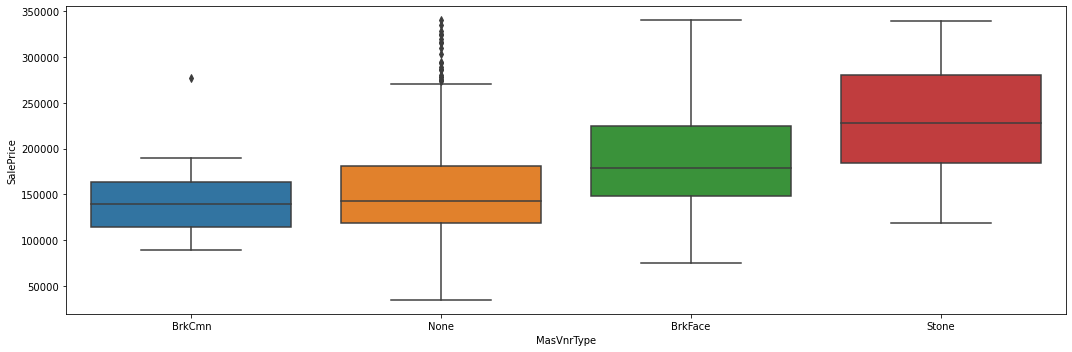

In [156]:
## Ploting the box plot for level in MasVnrType for SalePrice

sns.boxplot(x = X_woo['MasVnrType'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

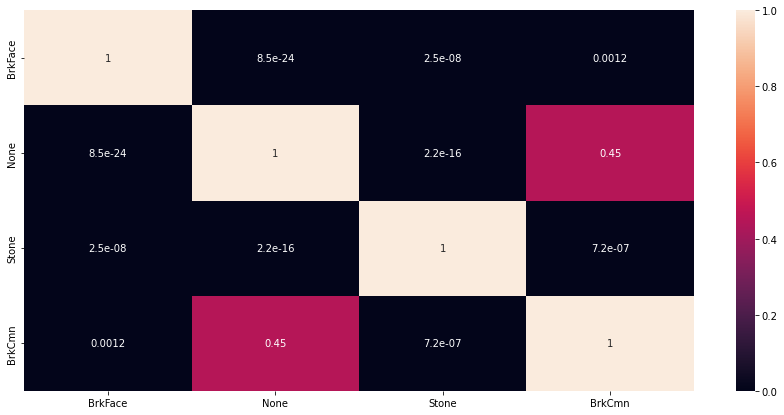

In [157]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('MasVnrType')

**Observations**
- There are 4 categories
- BrkComn has data <2%
- 'BrkComn' + 'None' Categories can be combined

In [158]:
## Recategorizing the columns as per above observations

MasVnrType_mod = X_woo['MasVnrType']

MasVnrType_mod = MasVnrType_mod.apply(lambda x: 'BrkC-None' if x in ['None', 'BrkCmn'] else x)

MasVnrType_mod.value_counts()

BrkC-None    876
BrkFace      418
Stone        105
Name: MasVnrType, dtype: int64

**Analysing the variable Foundation** -  Type of foundation

In [159]:
## Unique value count
X_woo.Foundation.value_counts(normalize=True)*100

CBlock    44.960686
PConc     42.315940
BrkTil    10.364546
Slab       1.715511
Stone      0.428878
Wood       0.214439
Name: Foundation, dtype: float64

In [160]:
## Grouping the median SalePrice by Foundation

grouped = y_woo.SalePrice.groupby(by = X_woo.Foundation, axis=0 ).median()
grouped.sort_values()

Foundation
Slab      104150.0
BrkTil    125000.0
Stone     126500.0
CBlock    141000.0
Wood      164000.0
PConc     197000.0
Name: SalePrice, dtype: float64

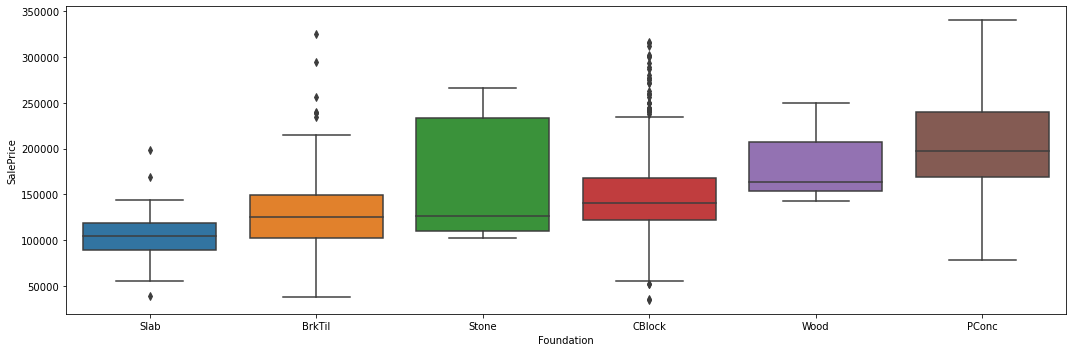

In [161]:
## Ploting the box plot for level in Foundation for SalePrice

sns.boxplot(x = X_woo['Foundation'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

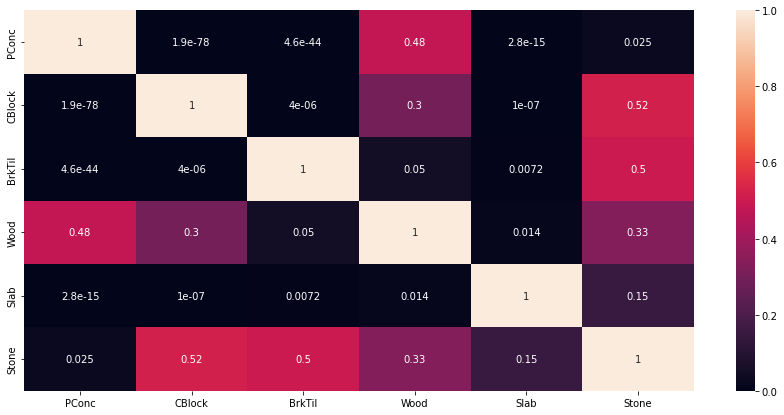

In [162]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('Foundation')

**Observations**
- There are 6 categories
- 'Wood', 'Stone' and 'Slab' have data <2%
- Following categories are combined:
    - Wood + PConc
    - Stone + CBlock

In [163]:
## Recategorizing the columns as per above observations

Foundation_mod = X_woo['Foundation']

Foundation_mod = Foundation_mod.apply(lambda x: 'Wd-PC' if x in ['Wood', 'PConc'] else x)
Foundation_mod = Foundation_mod.apply(lambda x: 'St-CB' if x in ['Stone', 'CBlock'] else x)

Foundation_mod.value_counts()

St-CB     635
Wd-PC     595
BrkTil    145
Slab       24
Name: Foundation, dtype: int64

**Analysing the variable Heating** - Type of heating

In [164]:
## Unique value count
X_woo.Heating.value_counts(normalize=True)*100

GasA     97.784132
GasW      1.215154
Grav      0.500357
Wall      0.285919
OthW      0.142959
Floor     0.071480
Name: Heating, dtype: float64

In [165]:
X_woo.Heating.value_counts()

GasA     1368
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

**Observations**
- There are 6 categories
- 'GasA' has more than 97% data. Hence dropping the variable

In [166]:
## Dropping the variable "Heating"

X_woo.drop(columns=['Heating'], inplace=True)
X_woo.shape

(1399, 69)

**Analysing the variable CentralAir** -  Central air conditioning

In [167]:
## Unique value count
X_woo.CentralAir.value_counts(normalize=True)*100

Y    93.209435
N     6.790565
Name: CentralAir, dtype: float64

In [168]:
## Grouping the median SalePrice by CentralAir

grouped = y_woo.SalePrice.groupby(by = X_woo.CentralAir, axis=0 ).median()
grouped.sort_values()

CentralAir
N     98000.0
Y    164800.0
Name: SalePrice, dtype: float64

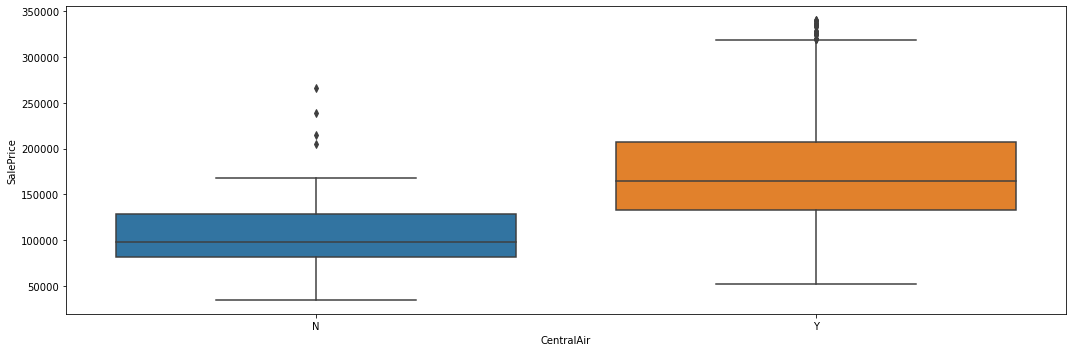

In [169]:
## Ploting the box plot for level in CentralAir for SalePrice

sns.boxplot(x = X_woo['CentralAir'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

**Observations**
- Median price of houses having Central Air Conditioning is higher than one without

In [170]:
CentralAir_mod = X_woo['CentralAir']
CentralAir_mod.shape

(1399,)

**Analysing the variable Electrical** -Electrical system

In [171]:
## Unique value count
X_woo.Electrical.value_counts(normalize=True)*100

SBrkr    91.065046
FuseA     6.719085
FuseF     1.929950
FuseP     0.214439
Mix       0.071480
Name: Electrical, dtype: float64

In [172]:
## Grouping the median SalePrice by Electrical

grouped = y_woo.SalePrice.groupby(by = X_woo.Electrical, axis=0 ).median()
grouped.sort_values()

Electrical
Mix       67000.0
FuseP     82000.0
FuseF    115000.0
FuseA    121250.0
SBrkr    165275.0
Name: SalePrice, dtype: float64

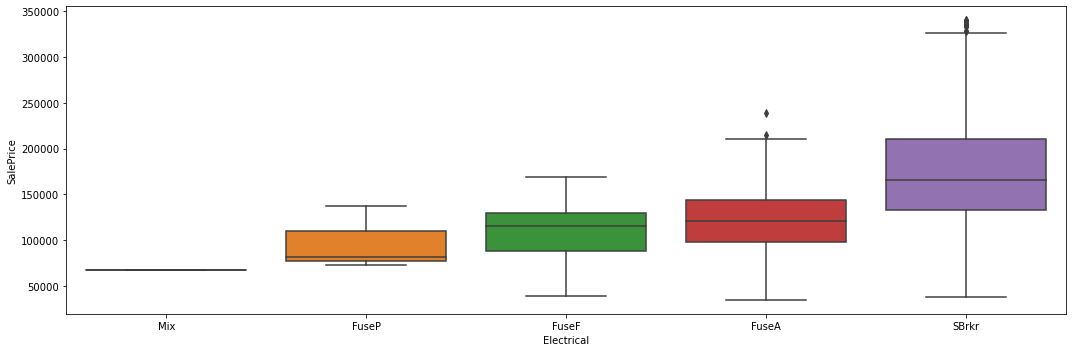

In [173]:
## Ploting the box plot for level in Electrical for SalePrice

sns.boxplot(x = X_woo['Electrical'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

**Observations**
- There are 5 categories, 'SBrkr' has 91% of data, rest are have small representations
- Minority classes can be combined into other
- 'SBrkr' category has the high median SalePrice compared to others

In [174]:
## Recategorizing the columns as per above observations

Electrical_mod = X_woo['Electrical']

Electrical_mod = Electrical_mod.apply(lambda x: 'Others' if x in ['Mix', 'FuseP', 'FuseF', 'FuseA'] else x)

Electrical_mod.value_counts()

SBrkr     1274
Others     125
Name: Electrical, dtype: int64

**Analysing the variable GarageType** - Garage location

In [175]:
## Unique value count
X_woo.GarageType.value_counts(normalize=True)*100

Attchd     59.042173
Detchd     27.591137
NA          5.789850
BuiltIn     5.218013
Basment     1.286633
CarPort     0.643317
2Types      0.428878
Name: GarageType, dtype: float64

In [176]:
## Grouping the median SalePrice by GarageType

grouped = y_woo.SalePrice.groupby(by = X_woo.GarageType, axis=0 ).median()
grouped.sort_values()

GarageType
NA         100000.0
CarPort    108000.0
Detchd     129500.0
Basment    146500.0
2Types     159000.0
Attchd     180750.0
BuiltIn    215000.0
Name: SalePrice, dtype: float64

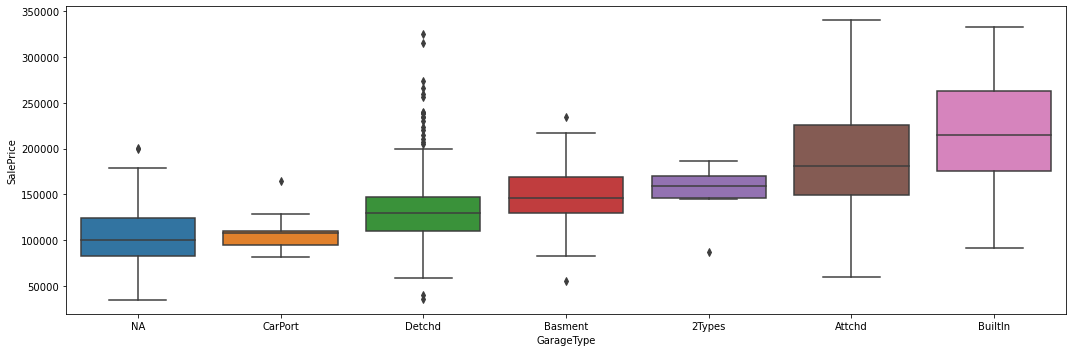

In [177]:
## Ploting the box plot for level in GarageType for SalePrice

sns.boxplot(x = X_woo['GarageType'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

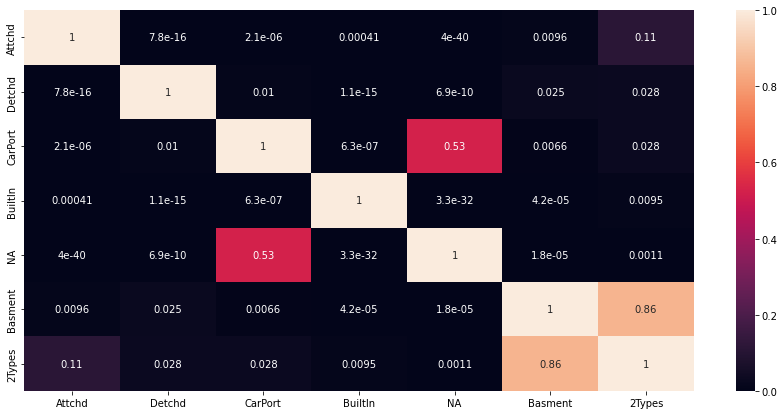

In [178]:
## provides p-value from Kolmogorov–Smirnov test for categorical features vs SalePrice to check 
## if the levels/categories in the feature can be combined 

kolmogorov_stat('GarageType')

**Observations**
- There are 7 categories, 'Attchd' & 'Detchd' represents close to 90% of data, rest are have small representations
- Minority classes can be combined into other
    - "NA" + "CarPort"
    - "2Types" + "Basement"
- "Buildin" Garages costs more

In [179]:
## Recategorizing the columns as per above observations

GarageType_mod = X_woo['GarageType']

GarageType_mod = GarageType_mod.apply(lambda x: 'NA-CP' if x in ['NA', 'CarPort'] else x)
GarageType_mod = GarageType_mod.apply(lambda x: '2T-Bm' if x in ['2Types', 'Basment'] else x)
GarageType_mod.value_counts()

Attchd     826
Detchd     386
NA-CP       90
BuiltIn     73
2T-Bm       24
Name: GarageType, dtype: int64

**Analysing the variable MiscFeatur** -  Miscellaneous feature not covered in other categories

In [180]:
## Unique value count
X_woo.MiscFeature.value_counts(normalize=True)*100

NA      96.140100
Shed     3.502502
Gar2     0.142959
Othr     0.142959
TenC     0.071480
Name: MiscFeature, dtype: float64

In [181]:
## Grouping the median SalePrice by MiscFeature

grouped = y_woo.SalePrice.groupby(by = X_woo.MiscFeature, axis=0 ).median()
grouped.sort_values()

MiscFeature
Othr     94000.0
Shed    144000.0
NA      160000.0
Gar2    170750.0
TenC    250000.0
Name: SalePrice, dtype: float64

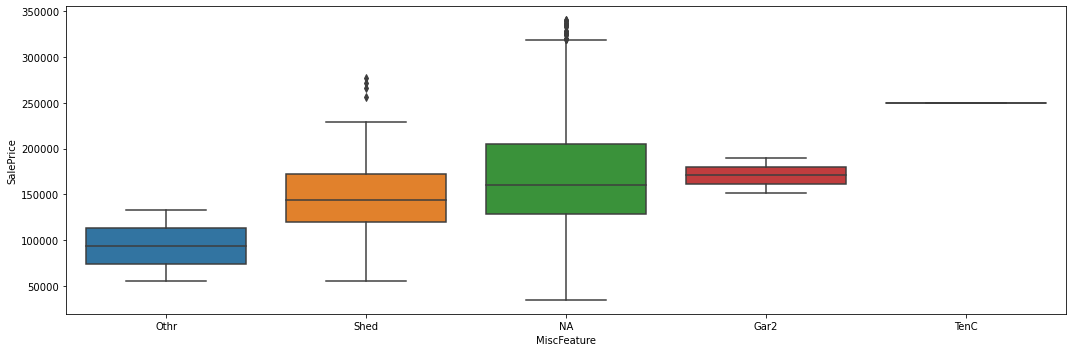

In [182]:
## Ploting the box plot for level in MiscFeature for SalePrice

sns.boxplot(x = X_woo['MiscFeature'], y = y_woo['SalePrice'], order=grouped.sort_values().index)
plt.tight_layout();

**Observations**
- There are 5 categories, 'NA' represents about 96% of data, rest are have small representations
- No clear distiction in terms of median price of the houses for presence and absence of MiscFeatures

- Can create new feature, weather there is MiscFeature in the property or not, NA = 0, presence of any MiscFeature = 1

In [183]:
## Grouping the median SalePrice by MiscFeature
MiscFeature_mod = X_woo['MiscFeature']

MiscFeature_mod = MiscFeature_mod.apply(lambda x: 'YES' if x in ['Othr', 'Shed', 'Gar2', 'TenC'] else x)
MiscFeature_mod = MiscFeature_mod.apply(lambda x: 'NO' if x in ['NA'] else x)
MiscFeature_mod.value_counts()

NO     1345
YES      54
Name: MiscFeature, dtype: int64

In [184]:
## Concatinating all the modified Nominal Categorical Features

Cat_featurs = pd.concat([MSSubClass_mod, MSZonins_mod, LotShape_mod, LandContour_mod, LotConfig_mod, LandSlope_mod, Neighborhood_mod, Condition1_mod,
 MasVnrType_mod, BldgType_mod, HouseStyle_mod, RoofStyle_mod, Exterior1st_mod, Foundation_mod, CentralAir_mod, Electrical_mod,
 GarageType_mod, MiscFeature_mod], axis=1, ignore_index=False)
print(Cat_featurs.shape)
Cat_featurs.head(1)

(1399, 18)


MSSubClass MSZoning LotShape LandContour LotConfig LandSlope Neighborhood  \
Id                                                                             
1       40-60       RL      Reg         Lvl    Inside       Gtl     Cl-Cr-Co   

   Condition1 MasVnrType BldgType     HouseStyle RoofStyle Exterior1st  \
Id                                                                       
1        Norm    BrkFace     1Fam  2Story-2.5Fin     Gable     VinylSd   

   Foundation CentralAir Electrical GarageType MiscFeature  
Id                                                          
1       Wd-PC          Y      SBrkr     Attchd          NO

In [185]:
## Renaming all the categorical features

modified_col_cat = ['MSSubClass_m', 'MSZonins_m', 'LotShape_m', 'LandContour_m', 'LotConfig_m', 'LandSlope_m', 
                    'Neighborhood_m', 'Condition1_m','MasVnrType_m', 'BldgType_m', 'HouseStyle_m', 'RoofStyle_m', 
                    'Exterior1st_m', 'Foundation_m', 'CentralAir_m', 'Electrical_m','GarageType_m', 'MiscFeature_m']


Cat_featurs.columns=modified_col_cat
Cat_featurs.head(1)

MSSubClass_m MSZonins_m LotShape_m LandContour_m LotConfig_m LandSlope_m  \
Id                                                                            
1         40-60         RL        Reg           Lvl      Inside         Gtl   

   Neighborhood_m Condition1_m MasVnrType_m BldgType_m   HouseStyle_m  \
Id                                                                      
1        Cl-Cr-Co         Norm      BrkFace       1Fam  2Story-2.5Fin   

   RoofStyle_m Exterior1st_m Foundation_m CentralAir_m Electrical_m  \
Id                                                                    
1        Gable       VinylSd        Wd-PC            Y        SBrkr   

   GarageType_m MiscFeature_m  
Id                             
1        Attchd            NO

### Using Label Encoder for Ordinal Variables

In [186]:
from sklearn.preprocessing import LabelEncoder

- Following Catergorical variables are treated as Ordinal Variables and are Encoded

`ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `HeatingQC`, `KitchenQual`, `Functional`,  `FireplaceQu`, `GarageFinish`, `GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`

**Encoding 'ExterQual'**

In [187]:
## Checking for Unique values and counts

print(X_woo['ExterQual'].unique().to_list())
X_woo['ExterQual'].value_counts()

['Gd', 'TA', 'Ex', 'Fa']


TA    902
Gd    459
Ex     24
Fa     14
Name: ExterQual, dtype: int64

In [188]:
## Implimenting Encoding Map

ExterQual_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1 }

ExterQual_mod = pd.DataFrame(data = X_woo['ExterQual'].map(ExterQual_map))
ExterQual_mod.rename(columns={'ExterQual': 'ExterQual_m'}, inplace=True)

print(ExterQual_mod['ExterQual_m'].unique().to_list())
ExterQual_mod['ExterQual_m'].value_counts()

[4, 3, 5, 2]


3    902
4    459
5     24
2     14
Name: ExterQual_m, dtype: int64

**Encoding 'ExterCond'**

In [189]:
## Checking for Unique values and counts

print(X_woo['ExterCond'].unique().to_list())
X_woo['ExterCond'].value_counts()

['TA', 'Gd', 'Fa', 'Po', 'Ex']


TA    1225
Gd     142
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [190]:
## Implimenting Encoding Map

ExterCond_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1 }

ExterCond_mod = pd.DataFrame(data = X_woo['ExterCond'].map(ExterCond_map))
ExterCond_mod.rename(columns={'ExterCond': 'ExterCond_m'}, inplace=True)

print(ExterCond_mod['ExterCond_m'].unique().to_list())
ExterCond_mod['ExterCond_m'].value_counts()

[3, 4, 2, 1, 5]


3    1225
4     142
2      28
5       3
1       1
Name: ExterCond_m, dtype: int64

**Encoding 'BsmtQual'**

In [191]:
## Checking for Unique values and counts

print(X_woo['BsmtQual'].unique().to_list())
X_woo['BsmtQual'].value_counts()

['Gd', 'TA', 'Ex', 'NA', 'Fa']


TA    647
Gd    604
Ex     76
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [192]:
## Implimenting Encoding Map

BsmtQual_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA': 0}

BsmtQual_mod = pd.DataFrame(data = X_woo['BsmtQual'].map(BsmtQual_map))
BsmtQual_mod.rename(columns={'BsmtQual': 'BsmtQual_m'}, inplace=True)

print(BsmtQual_mod['BsmtQual_m'].unique().to_list())
BsmtQual_mod['BsmtQual_m'].value_counts()

[4, 3, 5, 0, 2]


3    647
4    604
5     76
0     37
2     35
Name: BsmtQual_m, dtype: int64

**Encoding 'BsmtCond'**

In [193]:
## Checking for Unique values and counts

print(X_woo['BsmtCond'].unique().to_list())
X_woo['BsmtCond'].value_counts()

['TA', 'Gd', 'NA', 'Fa', 'Po']


TA    1254
Gd      61
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [194]:
## Implimenting Encoding Map

BsmtCond_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA': 0}

BsmtCond_mod = pd.DataFrame(data = X_woo['BsmtCond'].map(BsmtCond_map))
BsmtCond_mod.rename(columns={'BsmtCond': 'BsmtCond_m'}, inplace=True)

print(BsmtCond_mod['BsmtCond_m'].unique().to_list())
BsmtCond_mod['BsmtCond_m'].value_counts()

[3, 4, 0, 2, 1]


3    1254
4      61
2      45
0      37
1       2
Name: BsmtCond_m, dtype: int64

**Encoding 'BsmtExposure'**

In [195]:
## Checking for Unique values and counts

print(X_woo['BsmtExposure'].unique().to_list())
X_woo['BsmtExposure'].value_counts()

['No', 'Gd', 'Mn', 'Av', 'NA']


No    941
Av    205
Mn    108
Gd    107
NA     38
Name: BsmtExposure, dtype: int64

In [196]:
## Implimenting Encoding Map

BsmtExposure_map= {'Gd': 4, 'Av': 3, 'Mn': 2, 'No' : 1, 'NA': 0}

BsmtExposure_mod = pd.DataFrame(data = X_woo['BsmtExposure'].map(BsmtExposure_map))
BsmtExposure_mod.rename(columns={'BsmtExposure': 'BsmtExposure_m'}, inplace=True)

print(BsmtExposure_mod['BsmtExposure_m'].unique().to_list())
BsmtExposure_mod['BsmtExposure_m'].value_counts()

[1, 4, 2, 3, 0]


1    941
3    205
2    108
4    107
0     38
Name: BsmtExposure_m, dtype: int64

**Encoding 'BsmtFinType1'**

In [197]:
## Checking for Unique values and counts

print(X_woo['BsmtFinType1'].unique().to_list())
X_woo['BsmtFinType1'].value_counts()

['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NA', 'LwQ']


Unf    419
GLQ    372
ALQ    218
BLQ    147
Rec    132
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [198]:
## Implimenting Encoding Map

BsmtFinType1_map= {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec' : 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}

BsmtFinType1_mod = pd.DataFrame(data = X_woo['BsmtFinType1'].map(BsmtFinType1_map))
BsmtFinType1_mod.rename(columns={'BsmtFinType1': 'BsmtFinType1_m'}, inplace=True)

print(BsmtFinType1_mod['BsmtFinType1_m'].unique().to_list())
BsmtFinType1_mod['BsmtFinType1_m'].value_counts()

[6, 5, 1, 3, 4, 0, 2]


1    419
6    372
5    218
4    147
3    132
2     74
0     37
Name: BsmtFinType1_m, dtype: int64

**Encoding 'BsmtFinType2'**

In [199]:
## Checking for Unique values and counts

print(X_woo['BsmtFinType2'].unique().to_list())
X_woo['BsmtFinType2'].value_counts()

['Unf', 'BLQ', 'NA', 'ALQ', 'Rec', 'LwQ', 'GLQ']


Unf    1198
Rec      52
LwQ      46
NA       38
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

In [200]:
## Implimenting Encoding Map

BsmtFinType2_map= {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec' : 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}

BsmtFinType2_mod = pd.DataFrame(data = X_woo['BsmtFinType2'].map(BsmtFinType2_map))
BsmtFinType2_mod.rename(columns={'BsmtFinType2': 'BsmtFinType2_m'}, inplace=True)

print(BsmtFinType2_mod['BsmtFinType2_m'].unique().to_list())
BsmtFinType2_mod['BsmtFinType2_m'].value_counts()

[1, 4, 0, 5, 3, 2, 6]


1    1198
3      52
2      46
0      38
4      33
5      18
6      14
Name: BsmtFinType2_m, dtype: int64

**Encoding 'HeatingQC'**

In [201]:
## Checking for Unique values and counts

print(X_woo['HeatingQC'].unique().to_list())
X_woo['HeatingQC'].value_counts()

['Ex', 'Gd', 'TA', 'Fa', 'Po']


Ex    685
TA    426
Gd    238
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [202]:
## Implimenting Encoding Map

HeatingQC_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1}

HeatingQC_mod = pd.DataFrame(data = X_woo['HeatingQC'].map(HeatingQC_map))
HeatingQC_mod.rename(columns={'HeatingQC': 'HeatingQC_m'}, inplace=True)

print(HeatingQC_mod['HeatingQC_m'].unique().to_list())
HeatingQC_mod['HeatingQC_m'].value_counts()

[5, 4, 3, 2, 1]


5    685
3    426
4    238
2     49
1      1
Name: HeatingQC_m, dtype: int64

**Encoding 'KitchenQual'**

In [203]:
## Checking for Unique values and counts

print(X_woo['KitchenQual'].unique().to_list())
X_woo['KitchenQual'].value_counts()

['Gd', 'TA', 'Fa', 'Ex']


TA    733
Gd    565
Ex     62
Fa     39
Name: KitchenQual, dtype: int64

In [204]:
## Implimenting Encoding Map

KitchenQual_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1}

KitchenQual_mod = pd.DataFrame(data = X_woo['KitchenQual'].map(KitchenQual_map))
KitchenQual_mod.rename(columns={'KitchenQual': 'KitchenQual_m'}, inplace=True)

print(KitchenQual_mod['KitchenQual_m'].unique().to_list())
KitchenQual_mod['KitchenQual_m'].value_counts()

[4, 3, 2, 5]


3    733
4    565
5     62
2     39
Name: KitchenQual_m, dtype: int64

**Encoding 'Functional'**

In [205]:
## Checking for Unique values and counts

print(X_woo['Functional'].unique().to_list())
X_woo['Functional'].value_counts()

['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev']


Typ     1300
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [206]:
## Implimenting Encoding Map

Functional_map= {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod' : 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

Functional_mod = pd.DataFrame(data = X_woo['Functional'].map(Functional_map))
Functional_mod.rename(columns={'Functional': 'Functional_m'}, inplace=True)

print(Functional_mod['Functional_m'].unique().to_list())
Functional_mod['Functional_m'].value_counts()

[7, 6, 3, 5, 4, 2, 1]


7    1300
5      34
6      31
3      14
4      14
2       5
1       1
Name: Functional_m, dtype: int64

**Encoding 'FireplaceQu'**

In [207]:
## Checking for Unique values and counts

print(X_woo['FireplaceQu'].unique().to_list())
X_woo['FireplaceQu'].value_counts()

['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po']


NA    689
Gd    340
TA    303
Fa     33
Po     20
Ex     14
Name: FireplaceQu, dtype: int64

In [208]:
## Implimenting Encoding Map

FireplaceQu_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0}

FireplaceQu_mod = pd.DataFrame(data = X_woo['FireplaceQu'].map(FireplaceQu_map))
FireplaceQu_mod.rename(columns={'FireplaceQu': 'FireplaceQu_m'}, inplace=True)

print(FireplaceQu_mod['FireplaceQu_m'].unique().to_list())
FireplaceQu_mod['FireplaceQu_m'].value_counts()

[0, 3, 4, 2, 5, 1]


0    689
4    340
3    303
2     33
1     20
5     14
Name: FireplaceQu_m, dtype: int64

**Encoding 'GarageFinish'**

In [209]:
## Checking for Unique values and counts

print(X_woo['GarageFinish'].unique().to_list())
X_woo['GarageFinish'].value_counts()

['RFn', 'Unf', 'Fin', 'NA']


Unf    602
RFn    409
Fin    307
NA      81
Name: GarageFinish, dtype: int64

In [210]:
## Implimenting Encoding Map

GarageFinish_map= {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA':0}

GarageFinish_mod = pd.DataFrame(data = X_woo['GarageFinish'].map(GarageFinish_map))
GarageFinish_mod.rename(columns={'GarageFinish': 'GarageFinish_m'}, inplace=True)

print(GarageFinish_mod['GarageFinish_m'].unique().to_list())
GarageFinish_mod['GarageFinish_m'].value_counts()

[2, 1, 3, 0]


1    602
2    409
3    307
0     81
Name: GarageFinish_m, dtype: int64

**Encoding 'GarageQual'**

In [211]:
## Checking for Unique values and counts

print(X_woo['GarageQual'].unique().to_list())
X_woo['GarageQual'].value_counts()

['TA', 'Fa', 'Gd', 'NA', 'Po', 'Ex']


TA    1251
NA      81
Fa      48
Gd      14
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [212]:
## Implimenting Encoding Map

GarageQual_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0}

GarageQual_mod = pd.DataFrame(data = X_woo['GarageQual'].map(GarageQual_map))
GarageQual_mod.rename(columns={'GarageQual': 'GarageQual_m'}, inplace=True)

print(GarageQual_mod['GarageQual_m'].unique().to_list())
GarageQual_mod['GarageQual_m'].value_counts()

[3, 2, 4, 0, 1, 5]


3    1251
0      81
2      48
4      14
1       3
5       2
Name: GarageQual_m, dtype: int64

**Encoding 'GarageCond'**

In [213]:
## Checking for Unique values and counts

print(X_woo['GarageCond'].unique().to_list())
X_woo['GarageCond'].value_counts()

['TA', 'Fa', 'NA', 'Gd', 'Po', 'Ex']


TA    1265
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [214]:
## Implimenting Encoding Map

GarageCond_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0}

GarageCond_mod = pd.DataFrame(data = X_woo['GarageCond'].map(GarageCond_map))
GarageCond_mod.rename(columns={'GarageCond': 'GarageCond_m'}, inplace=True)

print(GarageCond_mod['GarageCond_m'].unique().to_list())
GarageCond_mod['GarageCond_m'].value_counts()

[3, 2, 0, 4, 1, 5]


3    1265
0      81
2      35
4       9
1       7
5       2
Name: GarageCond_m, dtype: int64

**Encoding 'PavedDrive'**

In [215]:
## Checking for Unique values and counts

print(X_woo['PavedDrive'].unique().to_list())
X_woo['PavedDrive'].value_counts()

['Y', 'N', 'P']


Y    1279
N      90
P      30
Name: PavedDrive, dtype: int64

In [216]:
## Implimenting Encoding Map

PavedDrive_map= {'Y': 3, 'P': 2, 'N': 1}

PavedDrive_mod = pd.DataFrame(data = X_woo['PavedDrive'].map(PavedDrive_map))
PavedDrive_mod.rename(columns={'PavedDrive': 'PavedDrive_m'}, inplace=True)

print(PavedDrive_mod['PavedDrive_m'].unique().to_list())
PavedDrive_mod['PavedDrive_m'].value_counts()

[3, 1, 2]


3    1279
1      90
2      30
Name: PavedDrive_m, dtype: int64

**Encoding 'PoolQC'**

In [217]:
## Checking for Unique values and counts

print(X_woo['PoolQC'].unique().to_list())
X_woo['PoolQC'].value_counts()

['NA', 'Ex', 'Fa', 'Gd']


NA    1393
Gd       3
Fa       2
Ex       1
Name: PoolQC, dtype: int64

In [218]:
## Implimenting Encoding Map

PoolQC_map= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2, 'Po': 1, 'NA':0}

PoolQC_mod = pd.DataFrame(data = X_woo['PoolQC'].map(PoolQC_map))
PoolQC_mod.rename(columns={'PoolQC': 'PoolQC_m'}, inplace=True)

print(PoolQC_mod['PoolQC_m'].unique().to_list())
PoolQC_mod['PoolQC_m'].value_counts()

[0, 5, 2, 4]


0    1393
4       3
2       2
5       1
Name: PoolQC_m, dtype: int64

**Encoding 'Fence'**

In [219]:
## Checking for Unique values and counts

print(X_woo['Fence'].unique().to_list())
X_woo['Fence'].value_counts()

['NA', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw']


NA       1122
MnPrv     155
GdPrv      58
GdWo       53
MnWw       11
Name: Fence, dtype: int64

In [220]:
## Implimenting Encoding Map

Fence_map= {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw' : 1, 'NA':0}

Fence_mod = pd.DataFrame(data = X_woo['Fence'].map(Fence_map))
Fence_mod.rename(columns={'Fence': 'Fence_m'}, inplace=True)

print(Fence_mod['Fence_m'].unique().to_list())
Fence_mod['Fence_m'].value_counts()

[0, 3, 2, 4, 1]


0    1122
3     155
4      58
2      53
1      11
Name: Fence_m, dtype: int64

In [221]:
## Concatinatinve all the ordinal Categorical Features

Ordinal_Features = pd.concat([ExterQual_mod, ExterCond_mod, BsmtQual_mod, BsmtCond_mod, BsmtExposure_mod, BsmtFinType1_mod, 
                              BsmtFinType2_mod, HeatingQC_mod, KitchenQual_mod, Functional_mod, FireplaceQu_mod, 
                              GarageFinish_mod, GarageQual_mod, GarageCond_mod, PavedDrive_mod, PoolQC_mod, Fence_mod], 
                             axis=1, ignore_index=False)

Ordinal_Features = pd.concat([Ordinal_Features, X_woo[['OverallQual', 'OverallCond']]], axis=1, ignore_index=False)

print(Ordinal_Features.shape)
Ordinal_Features.head()

(1399, 19)


ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m BsmtExposure_m  \
Id                                                                
1            4           3          4          3              1   
2            3           3          4          3              4   
3            4           3          4          3              2   
4            3           3          3          4              1   
5            4           3          4          3              3   

   BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m Functional_m  \
Id                                                                        
1               6              1           5             4            7   
2               5              1           5             3            7   
3               6              1           5             4            7   
4               5              1           4             4            7   
5               6              1           5             4            7   

   FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m PavedDrive_m  \
Id                                                                       
1              0              2            3            3            3   
2              3              2            3            3            3   
3              3              2            3            3            3   
4              4              1            3            3            3   
5              3              2            3            3            3   

   PoolQC_m Fence_m OverallQual OverallCond  
Id                                           
1         0       0           7           5  
2         0       0           6           8  
3         0       0           7           5  
4         0       0           7           5  
5         0       0           8           5

In [222]:
## Dropping non-encoded categorical columns 

X_woo.drop(columns=ord_cat_cols, inplace=True)
print(X_woo.shape)

(1399, 50)


In [223]:
## Adding encoded categorical columns
X_woo = pd.concat([X_woo, Ordinal_Features], axis=1, ignore_index=False)
print(X_woo.shape)
X_woo.head(1)

(1399, 69)


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                            
1          60       RL         65.0     8450      Reg         Lvl    Inside   

   LandSlope Neighborhood Condition1 BldgType HouseStyle  YearBuilt  \
Id                                                                    
1        Gtl      CollgCr       Norm     1Fam     2Story       2003   

    YearRemodAdd RoofStyle Exterior1st MasVnrType  MasVnrArea Foundation  \
Id                                                                         
1           2003     Gable     VinylSd    BrkFace       196.0      PConc   

    BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF CentralAir Electrical  \
Id                                                                         
1          706           0        150          856          Y      SBrkr   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1          2         1             3             1             8           0   

   GarageType  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                            
1      Attchd       2003.0           2         548           0           61   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea MiscFeature  MiscVal  \
Id                                                                         
1               0          0            0         0          NA        0   

    YrSold ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m BsmtExposure_m  \
Id                                                                        
1     2008           4           3          4          3              1   

   BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m Functional_m  \
Id                                                                        
1               6              1           5             4            7   

   FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m PavedDrive_m  \
Id                                                                       
1              0              2            3            3            3   

   PoolQC_m Fence_m OverallQual OverallCond  
Id                                           
1         0       0           7           5

**Exploring Year Column**

In [224]:
yr_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [225]:
X_woo[yr_cols]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
Id                                                
1          2003          2003       2003.0    2008
2          1976          1976       1976.0    2007
3          2001          2002       2001.0    2008
4          1915          1970       1998.0    2006
5          2000          2000       2000.0    2008
...         ...           ...          ...     ...
1456       1999          2000       1999.0    2007
1457       1978          1988       1978.0    2010
1458       1941          2006       1941.0    2010
1459       1950          1996       1950.0    2010
1460       1965          1965       1965.0    2008

[1399 rows x 4 columns]

In [226]:
## Checking how many houses did not got Remodeled

len(X_woo[X_woo['YearBuilt']==X_woo['YearRemodAdd']])

740

**Obervations**
- New Feature can be added;
    - age of the property at the time of sale = "YrSold" - "YearBiult"
    - binary features as weather remodeled or not
    - age of the house after remodeling at the time of sale = "YrSold" - "YearRemodAdd"

In [227]:
## Adding new Feature Age of the house when sold
Age_sale = pd.DataFrame(X_woo['YrSold']-X_woo['YearBuilt'], columns=['Age@Sale'])
Age_sale.head()

Age@Sale
Id          
1          5
2         31
3          7
4         91
5          8

In [228]:
## Adding new Feature weather remodeled or not
Remodeled_YoN = pd.DataFrame(np.where(X_woo["YearBuilt"]==X_woo['YearRemodAdd'], 0, 1), 
                             columns=['Remodeled_YoN'], index = X_woo.index)
Remodeled_YoN.head()

Remodeled_YoN
Id               
1               0
2               0
3               1
4               1
5               0

In [229]:
## Adding new Feature age after remodeled when sold
Age_Remod = pd.DataFrame(np.where(Remodeled_YoN.Remodeled_YoN==1, X_woo['YrSold']-X_woo['YearRemodAdd'], 0), 
                         columns=['AgeRemod@Sale'], index = X_woo.index)
Age_Remod.head()

AgeRemod@Sale
Id               
1               0
2               0
3               6
4              36
5               0

In [230]:
X_woo['GarageYrBlt'] = X_woo['GarageYrBlt'].astype('category')

In [231]:
Year_features = pd.concat([Age_sale, Remodeled_YoN, Age_Remod, X_woo['GarageYrBlt']], axis=1, ignore_index=False)
Year_features

Age@Sale  Remodeled_YoN  AgeRemod@Sale GarageYrBlt
Id                                                      
1            5              0              0      2003.0
2           31              0              0      1976.0
3            7              1              6      2001.0
4           91              1             36      1998.0
5            8              0              0      2000.0
...        ...            ...            ...         ...
1456         8              1              7      1999.0
1457        32              1             22      1978.0
1458        69              1              4      1941.0
1459        60              1             14      1950.0
1460        43              0              0      1965.0

[1399 rows x 4 columns]

- Converting 'GarageYrBlt' to category type
- Dropping Year columns after added derived features - 'YrBuit' , 'YrSold' , 'YearRemodAdd', 'GarageYrBlt'
- Adding new features into the dataframe 

In [232]:
X_woo.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True)
X_woo.shape

(1399, 65)

In [233]:
print(X_woo.shape)
X_woo = pd.concat([X_woo, Year_features], axis=1, ignore_index=False)
print(X_woo.shape)

(1399, 65)
(1399, 69)


In [234]:
X_woo.head(1)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                            
1          60       RL         65.0     8450      Reg         Lvl    Inside   

   LandSlope Neighborhood Condition1 BldgType HouseStyle RoofStyle  \
Id                                                                   
1        Gtl      CollgCr       Norm     1Fam     2Story     Gable   

   Exterior1st MasVnrType  MasVnrArea Foundation  BsmtFinSF1  BsmtFinSF2  \
Id                                                                         
1      VinylSd    BrkFace       196.0      PConc         706           0   

    BsmtUnfSF  TotalBsmtSF CentralAir Electrical  1stFlrSF  2ndFlrSF  \
Id                                                                     
1         150          856          Y      SBrkr       856       854   

    LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
Id                                                                            
1              0       1710             1             0         2         1   

    BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces GarageType  \
Id                                                                    
1              3             1             8           0     Attchd   

    GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                              
1            2         548           0           61              0          0   

    ScreenPorch  PoolArea MiscFeature  MiscVal ExterQual_m ExterCond_m  \
Id                                                                       
1             0         0          NA        0           4           3   

   BsmtQual_m BsmtCond_m BsmtExposure_m BsmtFinType1_m BsmtFinType2_m  \
Id                                                                      
1           4          3              1              6              1   

   HeatingQC_m KitchenQual_m Functional_m FireplaceQu_m GarageFinish_m  \
Id                                                                       
1            5             4            7             0              2   

   GarageQual_m GarageCond_m PavedDrive_m PoolQC_m Fence_m OverallQual  \
Id                                                                       
1             3            3            3        0       0           7   

   OverallCond  Age@Sale  Remodeled_YoN  AgeRemod@Sale GarageYrBlt  
Id                                                                  
1            5         5              0              0      2003.0

### Analysing Numerical Features

In [235]:
## Extracting numerical columns
numerical_cols = X_woo.dtypes[(X_woo.dtypes=='int64') | (X_woo.dtypes=='float64')].index.to_list()

In [236]:
print(numerical_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age@Sale', 'AgeRemod@Sale']


In [237]:
len(numerical_cols)

30

In [238]:
X_woo[numerical_cols].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                        
1          65.0     8450       196.0         706           0        150   
2          80.0     9600         0.0         978           0        284   
3          68.0    11250       162.0         486           0        434   
4          60.0     9550         0.0         216           0        540   
5          84.0    14260       350.0         655           0        490   

    TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
Id                                                                           
1           856       856       854             0       1710             1   
2          1262      1262         0             0       1262             0   
3           920       920       866             0       1786             1   
4           756       961       756             0       1717             1   
5          1145      1145      1053             0       2198             1   

    BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
Id                                                                 
1              0         2         1             3             1   
2              1         2         0             3             1   
3              0         2         1             3             1   
4              0         1         0             3             1   
5              0         2         1             4             1   

    TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                              
1              8           0           2         548           0           61   
2              6           1           2         460         298            0   
3              6           1           2         608           0           42   
4              7           1           3         642           0           35   
5              9           1           3         836         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  Age@Sale  \
Id                                                                       
1               0          0            0         0        0         5   
2               0          0            0         0        0        31   
3               0          0            0         0        0         7   
4             272          0            0         0        0        91   
5               0          0            0         0        0         8   

    AgeRemod@Sale  
Id                 
1               0  
2               0  
3               6  
4              36  
5               0

- We donot have Total Area of the house, we can add this as a feature by addring Basement area + Living Area + 1st Floor Area + 2nd Floor Area
- We can also compute total Bed Rooms by adding all the Full and 0.5xHalf Bedroom

In [239]:
## Add the fetures TotalSFT and Total Bath
## remove the features TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, FullBath, HalfBath, BsmtFullBath, BsmtHalfBath

X_woo['TotalSFT'] = X_woo['TotalBsmtSF'] + X_woo['GrLivArea'] + X_woo['1stFlrSF'] + X_woo['2ndFlrSF']
X_woo['TotalBath'] = X_woo['FullBath'] + .5*X_woo['HalfBath'] + X_woo['BsmtFullBath'] + 0.5*X_woo['BsmtHalfBath']

X_woo.drop(columns=['TotalBsmtSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 
                    'BsmtHalfBath'], inplace=True)

print(X_woo.shape)

(1399, 63)


In [240]:
## Extracting numerical columns after modification

numerical_cols = X_woo.dtypes[(X_woo.dtypes=='int64') | (X_woo.dtypes=='float64')].index.to_list()

In [241]:
lo_cor_features = []
for i in numerical_cols:
    cor = round(np.corrcoef(X_woo[i], y_woo["SalePrice"])[0, 1], 3)
    if (cor>=-0.2 and cor <=0.2):
        print(f"Correlation between {i} and SalesPrice is = ",round(np.corrcoef(X_woo[i], y_woo["SalePrice"])[0, 1], 3))
        lo_cor_features.append(i)

Correlation between BsmtFinSF2 and SalesPrice is =  0.007
Correlation between LowQualFinSF and SalesPrice is =  -0.058
Correlation between KitchenAbvGr and SalesPrice is =  -0.147
Correlation between EnclosedPorch and SalesPrice is =  -0.145
Correlation between 3SsnPorch and SalesPrice is =  0.043
Correlation between ScreenPorch and SalesPrice is =  0.109
Correlation between PoolArea and SalesPrice is =  0.049
Correlation between MiscVal and SalesPrice is =  -0.013


In [242]:
print(lo_cor_features)

['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


- Above numerical features have very low correlation with SalePrice, hence can be droped

In [243]:
X_woo.drop(columns=lo_cor_features, inplace=True)
X_woo.shape

(1399, 55)

In [244]:
## Extracting numerical columns after modification

numerical_cols = X_woo.dtypes[(X_woo.dtypes=='int64') | (X_woo.dtypes=='float64')].index.to_list()
len(numerical_cols)

16

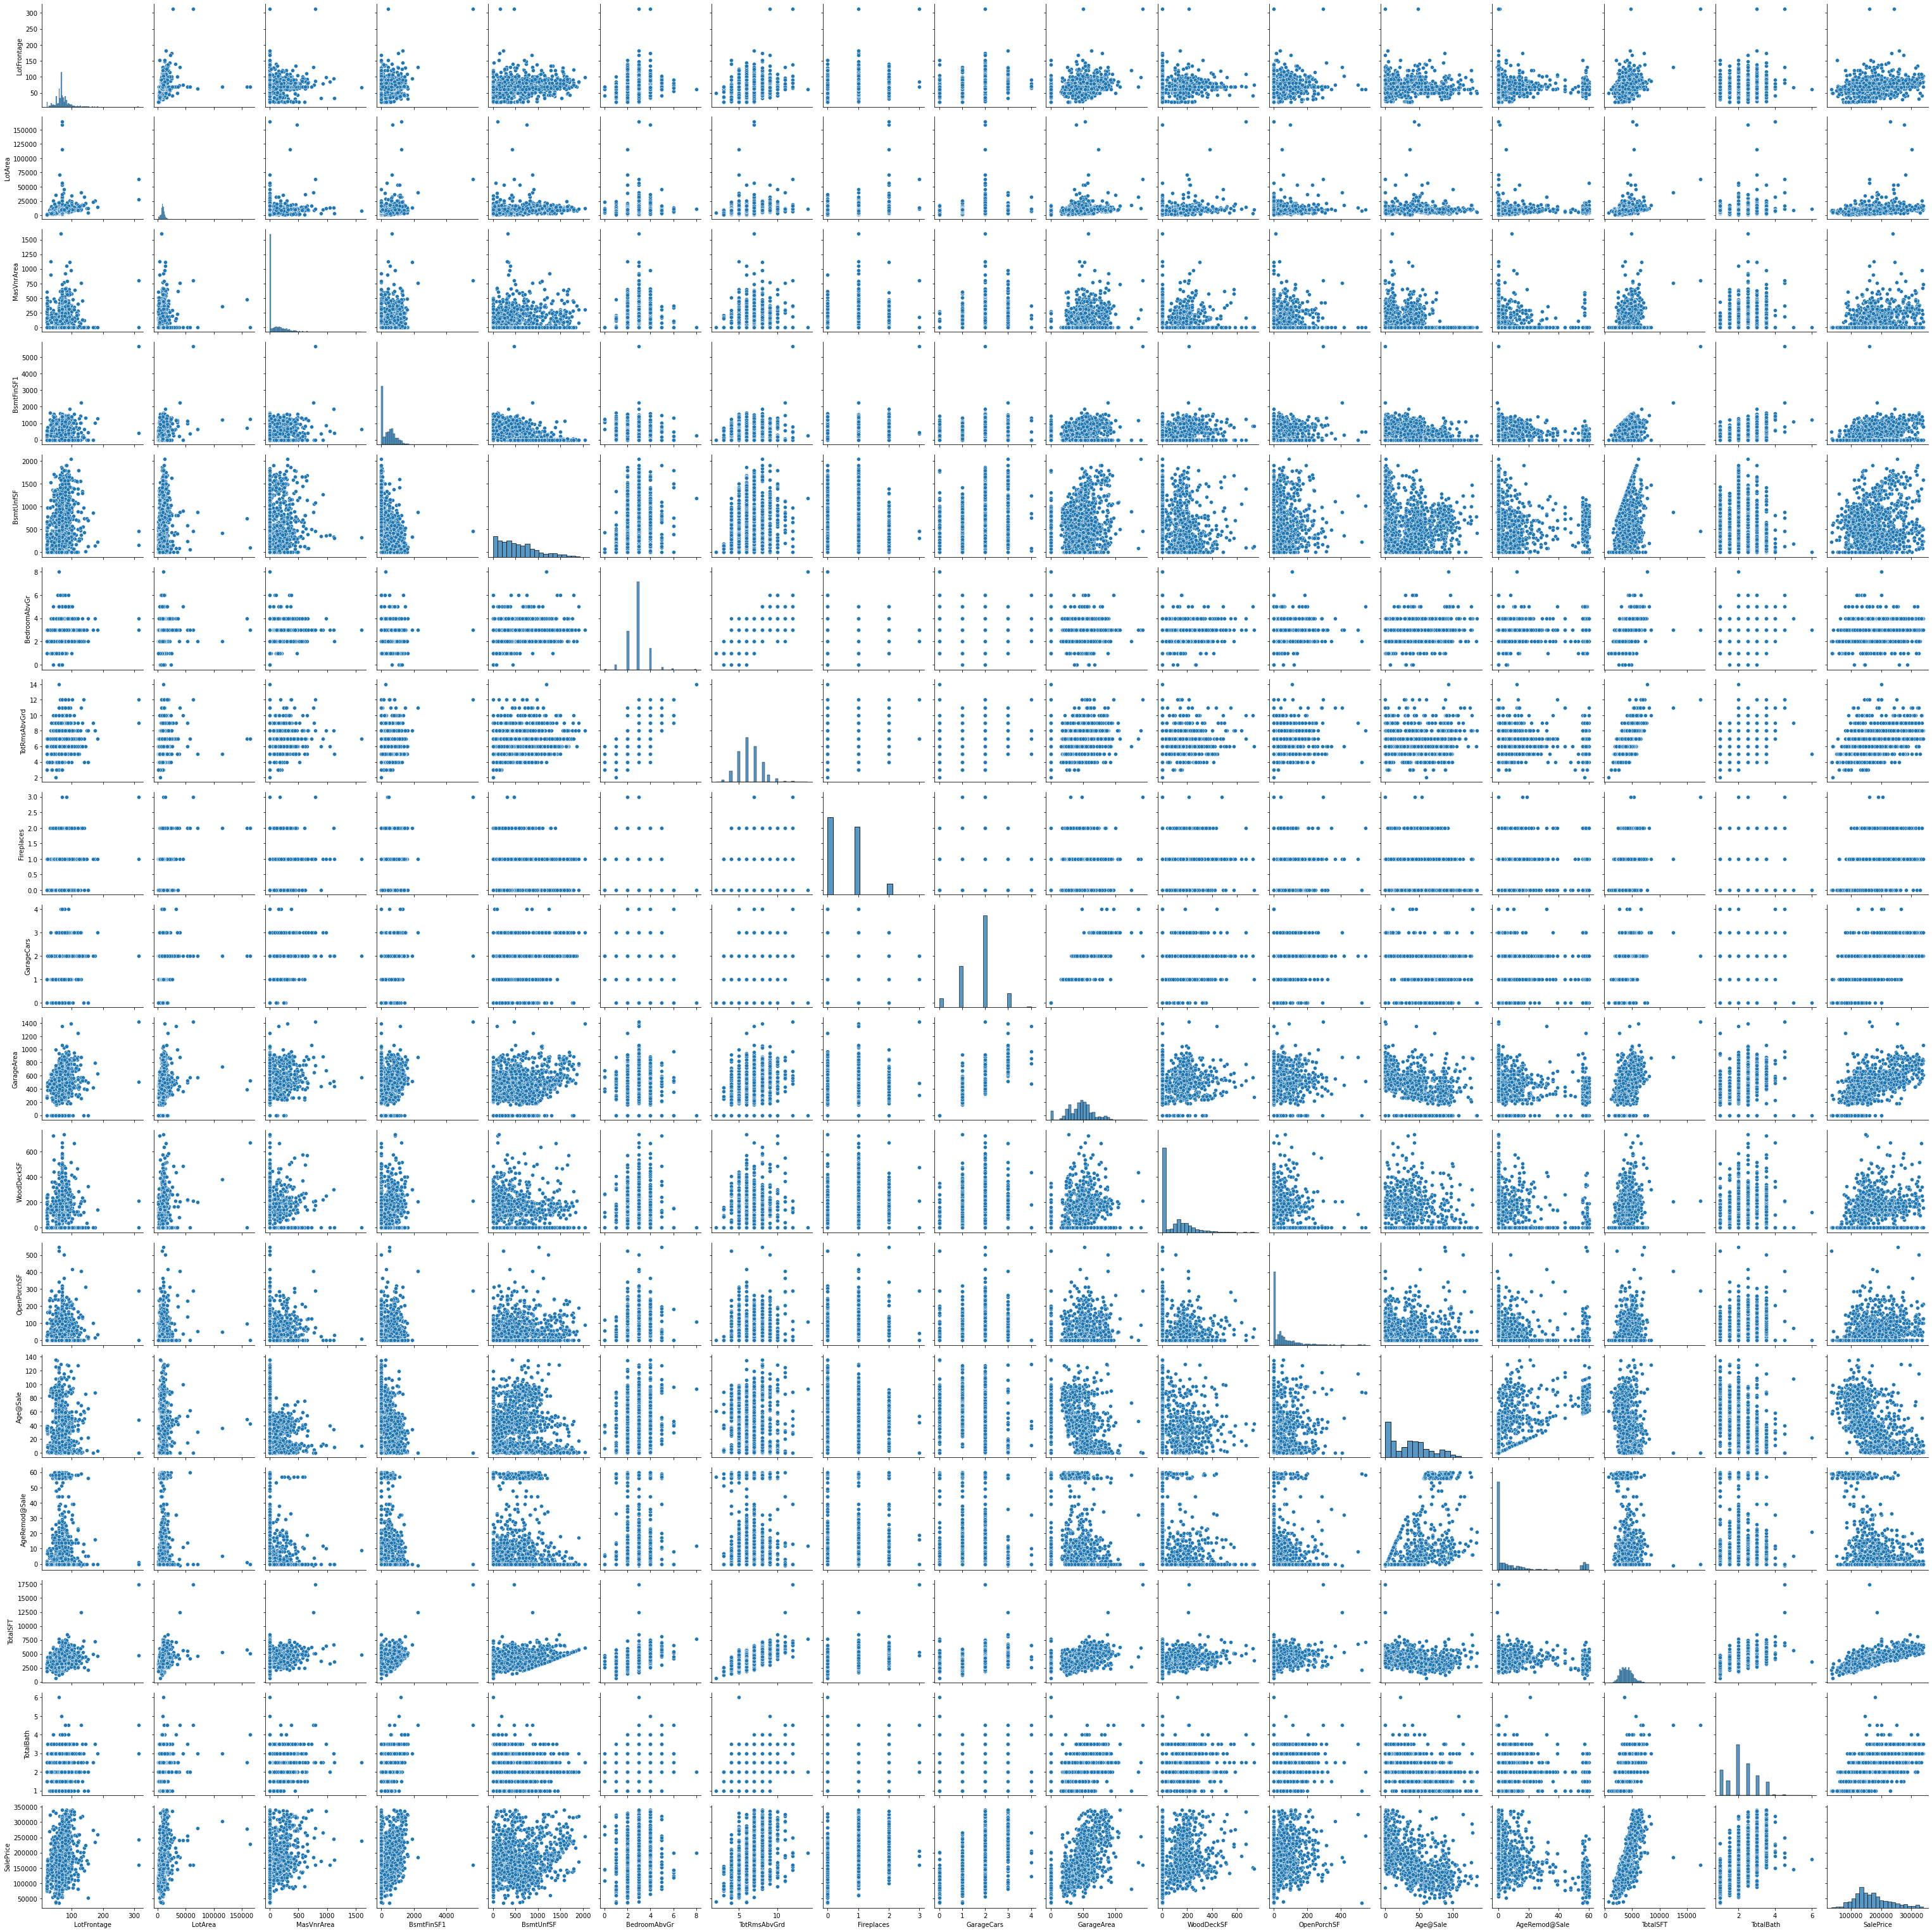

In [245]:
sns.pairplot(pd.concat([X_woo[numerical_cols], y_woo['SalePrice']], axis=1, ignore_index=False))
plt.tight_layout();

**Obsrevations**

- Features such as - `TotalSFT`, `TotalBath`, `WoodDeckSF`, `GarageArea` shows positve corrlation with `SalePrice`
- Features like - `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtUnfSF` does not show clear correlation with `SalePrice`

- Features such as - `Age@Sale` and `AgeRemod@Sale` shows clear negetive correlation

**Preparing Categorical Variables creating dummy variables**

In [246]:
cat_cols = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
            'MasVnrType', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Foundation', 'CentralAir', 'Electrical',
            'GarageType', 'MiscFeature']
len(cat_cols)

18

In [247]:
X_woo[cat_cols].head(1)

MSSubClass MSZoning LotShape LandContour LotConfig LandSlope Neighborhood  \
Id                                                                             
1          60       RL      Reg         Lvl    Inside       Gtl      CollgCr   

   Condition1 MasVnrType BldgType HouseStyle RoofStyle Exterior1st Foundation  \
Id                                                                              
1        Norm    BrkFace     1Fam     2Story     Gable     VinylSd      PConc   

   CentralAir Electrical GarageType MiscFeature  
Id                                               
1           Y      SBrkr     Attchd          NA

**Creating Dummy Variables for unmodified categorical variables**

In [248]:
## Creating Dummy Variables

cat_dummies = pd.get_dummies(X_woo[cat_cols], drop_first=True)
print(cat_dummies.shape)
cat_dummies.head()

(1399, 115)


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
Id                                                                              
1               0              0              0              0              1   
2               0              0              0              0              0   
3               0              0              0              0              1   
4               0              0              0              0              0   
5               0              0              0              0              1   

    MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
Id                                                                              
1               0              0              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               1              0              0              0              0   
5               0              0              0              0              0   

    MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
Id                                                                     
1             0            0            1            0             0   
2             0            0            1            0             0   
3             0            0            1            0             0   
4             0            0            1            0             0   
5             0            0            1            0             0   

    LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
Id                                                                 
1              0             1                0                0   
2              0             1                0                0   
3              0             0                0                0   
4              0             0                0                0   
5              0             0                0                0   

    LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                     
1                 1                  0              0              0   
2                 1                  0              1              0   
3                 1                  0              0              0   
4                 1                  0              0              0   
5                 1                  0              1              0   

    LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
Id                                                                         
1                  1              0              0                     0   
2                  0              0              0                     0   
3                  1              0              0                     0   
4                  0              0              0                     0   
5                  0              0              0                     0   

    Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
Id                                                                    
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4 

In [249]:
## Droping the categorical variables and adding the dummy variables to the data frame

X_woo.drop(columns=cat_cols, inplace=True)
X_woo = pd.concat([X_woo, cat_dummies], axis=1, ignore_index=False)
print(X_woo.shape)
X_woo.head(1)

(1399, 152)


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  BedroomAbvGr  \
Id                                                                          
1          65.0     8450       196.0         706        150             3   

    TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                              
1              8           0           2         548           0           61   

   ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m BsmtExposure_m  \
Id                                                                
1            4           3          4          3              1   

   BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m Functional_m  \
Id                                                                        
1               6              1           5             4            7   

   FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m PavedDrive_m  \
Id                                                                       
1              0              2            3            3            3   

   PoolQC_m Fence_m OverallQual OverallCond  Age@Sale  Remodeled_YoN  \
Id                                                                     
1         0       0           7           5         5              0   

    AgeRemod@Sale GarageYrBlt  TotalSFT  TotalBath  MSSubClass_30  \
Id                                                                  
1               0      2003.0      4276        3.5              0   

    MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
Id                                                                              
1               0              0              0              1              0   

    MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
Id                                                               
1               0              0              0              0   

    MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                   
1                0               0               0               0   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
Id                                                                     
1             0            0            1            0             0   

    LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
Id                                                                 
1              0             1                0                0   

    LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
Id                                                                     
1                 1                  0              0              0   

    LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
Id                                                                         
1                  1              0              0                     0   

    Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
Id                                                                    
1                     0                     0                     0   

    Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
Id                                                                     
1                      1                     0                     0   

    Neighborhood_Gilbert  ...  Neighborhood_Mitchel  Neighborhood_NAmes  \
Id                        ...                                             
1                      0  ...                     0                   0   

    Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
Id                                                                    
1                      0                    0                     0   

    Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhoo

**Creating Dummy Variables for modified categorical variables**

In [250]:
print(Cat_featurs.shape)
Cat_featurs.head(1)

(1399, 18)


MSSubClass_m MSZonins_m LotShape_m LandContour_m LotConfig_m LandSlope_m  \
Id                                                                            
1         40-60         RL        Reg           Lvl      Inside         Gtl   

   Neighborhood_m Condition1_m MasVnrType_m BldgType_m   HouseStyle_m  \
Id                                                                      
1        Cl-Cr-Co         Norm      BrkFace       1Fam  2Story-2.5Fin   

   RoofStyle_m Exterior1st_m Foundation_m CentralAir_m Electrical_m  \
Id                                                                    
1        Gable       VinylSd        Wd-PC            Y        SBrkr   

   GarageType_m MiscFeature_m  
Id                             
1        Attchd            NO

In [251]:
## Creating Dummy Variables for modifoed categorical feature

cat_dummies_mod = pd.get_dummies(Cat_featurs, drop_first=True)
print(cat_dummies_mod.shape)
cat_dummies_mod.head()

(1399, 51)


MSSubClass_m_120  MSSubClass_m_160  MSSubClass_m_20-70-75-85  \
Id                                                                 
1                  0                 0                         0   
2                  0                 0                         1   
3                  0                 0                         0   
4                  0                 0                         1   
5                  0                 0                         0   

    MSSubClass_m_30-45-180  MSSubClass_m_40-60  MSSubClass_m_50-90-190  \
Id                                                                       
1                        0                   1                       0   
2                        0                   0                       0   
3                        0                   1                       0   
4                        0                   0                       0   
5                        0                   1                       0   

    MSZonins_m_RL  MSZonins_m_RM-RH-C  LotShape_m_Reg  LandContour_m_Low-HLS  \
Id                                                                             
1               1                   0               1                      0   
2               1                   0               1                      0   
3               1                   0               0                      0   
4               1                   0               0                      0   
5               1                   0               0                      0   

    LandContour_m_Lvl  LotConfig_m_FR3-CulDSac  LotConfig_m_Inside  \
Id                                                                   
1                   1                        0                   1   
2                   1                        0                   0   
3                   1                        0                   1   
4                   1                        0                   0   
5                   1                        0                   0   

    LandSlope_m_Mod-Sev  Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  \
Id                                                          
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
5                     0                                 0   

    Neighborhood_m_BrD-ID-Me  Neighborhood_m_BrK-Ed-OT  \
Id                                                       
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   

    Neighborhood_m_Cl-Cr-Co  Neighborhood_m_SawyerW  Neighborhood_m_St-Nr-No  \
Id                                                                             
1                         1                       0                        0   
2                         0                       0                        0   
3                         1                       0                        0   
4                         1                       0                        0   
5                         0                       0                        1   

    Neighborhood_m_Ve-Ti-So  Condition1_m_Feedr-RRAe  Condition1_m_Norm  \
Id                                                                        
1                         0                        0                  1   
2                         1                        1                  0   
3                         0                        0                  1   
4                         0                        0                  1   
5                         0                        0                  1   

    Condition1_m_PosN-PosA-RRNn-RR

**Concatinating all the modfied featues together**

In [252]:
X_woo_mod = pd.concat([cat_dummies_mod, Ordinal_Features, Year_features, X_woo[numerical_cols]], axis=1, ignore_index=False)
print(X_woo_mod.shape)
X_woo_mod.head()

(1399, 90)


MSSubClass_m_120  MSSubClass_m_160  MSSubClass_m_20-70-75-85  \
Id                                                                 
1                  0                 0                         0   
2                  0                 0                         1   
3                  0                 0                         0   
4                  0                 0                         1   
5                  0                 0                         0   

    MSSubClass_m_30-45-180  MSSubClass_m_40-60  MSSubClass_m_50-90-190  \
Id                                                                       
1                        0                   1                       0   
2                        0                   0                       0   
3                        0                   1                       0   
4                        0                   0                       0   
5                        0                   1                       0   

    MSZonins_m_RL  MSZonins_m_RM-RH-C  LotShape_m_Reg  LandContour_m_Low-HLS  \
Id                                                                             
1               1                   0               1                      0   
2               1                   0               1                      0   
3               1                   0               0                      0   
4               1                   0               0                      0   
5               1                   0               0                      0   

    LandContour_m_Lvl  LotConfig_m_FR3-CulDSac  LotConfig_m_Inside  \
Id                                                                   
1                   1                        0                   1   
2                   1                        0                   0   
3                   1                        0                   1   
4                   1                        0                   0   
5                   1                        0                   0   

    LandSlope_m_Mod-Sev  Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  \
Id                                                          
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
5                     0                                 0   

    Neighborhood_m_BrD-ID-Me  Neighborhood_m_BrK-Ed-OT  \
Id                                                       
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   

    Neighborhood_m_Cl-Cr-Co  Neighborhood_m_SawyerW  Neighborhood_m_St-Nr-No  \
Id                                                                             
1                         1                       0                        0   
2                         0                       0                        0   
3                         1                       0                        0   
4                         1                       0                        0   
5                         0                       0                        1   

    Neighborhood_m_Ve-Ti-So  Condition1_m_Feedr-RRAe  Condition1_m_Norm  \
Id                                                                        
1                         0                        0                  1   
2                         1                        1                  0   
3                         0                        0                  1   
4                         0                        0                  1   
5                         0                        0                  1   

    Condition1_m_PosN-PosA-RRNn-RR

**Observations**

- Dataset with Unmodified categorical variables resulted in 152 features
- Dataset with modified category variabkes resulted in 90 features
- We will build models with these two dataset and check if modifications done to categorical features (Recategorisation) is of any use


### Creating Train, Test Set

**Since the dataset is very small (1399), will split it into only train and test set and use ***cross validation*** technique to tune the hyper-parameters**

In [253]:
## Splitting the data into train and test at 90:10 ratio

X_train, X_test, y_train, y_test = train_test_split(X_woo, y_woo, test_size=0.20, random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 152)
(280, 152)
(1119, 1)
(280, 1)


In [254]:
X_train.head(2)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  BedroomAbvGr  \
Id                                                                            
1173         35.0     4017         0.0           0        625             2   
50           66.0     7742         0.0         763        192             3   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                   
1173             5           0           2         625           0   
50               6           0           1         386           0   

      OpenPorchSF ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m  \
Id                                                                
1173           54           4           3          4          3   
50              0           3           3          3          3   

     BsmtExposure_m BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m  \
Id                                                                            
1173              1              1              1           5             4   
50                1              4              1           5             3   

     Functional_m FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m  \
Id                                                                         
1173            7             0              3            3            3   
50              7             0              1            3            3   

     PavedDrive_m PoolQC_m Fence_m OverallQual OverallCond  Age@Sale  \
Id                                                                     
1173            3        0       0           7           5         2   
50              3        0       3           5           7        41   

      Remodeled_YoN  AgeRemod@Sale GarageYrBlt  TotalSFT  TotalBath  \
Id                                                                    
1173              1              1      2006.0      3125        2.5   
50                0              0      1966.0      2865        2.0   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                 
1173              0              0              0              0   
50                0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
Id                                                                 
1173              0              0              0              0   
50                0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
Id                                                                   
1173              0              0               0               1   
50                0              0               0               0   

      MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                            
1173               0               0            1            0            0   
50                 0               0            0            0            1   

      MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
Id                                                                             
1173            0             0             0             0                0   
50              0             0             0             1                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
Id                                                                         
1173                0                1                  0              0   
50                  0                1                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
Id                                                                    
1173              0            

In [255]:
X_test.head(2)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  BedroomAbvGr  \
Id                                                                           
704         76.0     7630         0.0           0        360             4   
657         72.0    10007        54.0         806        247             3   

     TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                  
704             8           1           2         672         344   
657             5           0           1         312           0   

     OpenPorchSF ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m BsmtExposure_m  \
Id                                                                              
704            0           3           4          4          3              1   
657            0           4           3          3          3              1   

    BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m Functional_m  \
Id                                                                         
704              1              1           4             4            7   
657              5              1           5             4            7   

    FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m PavedDrive_m  \
Id                                                                        
704             1              1            3            3            1   
657             0              2            3            3            3   

    PoolQC_m Fence_m OverallQual OverallCond  Age@Sale  Remodeled_YoN  \
Id                                                                      
704        0       3           5           9       110              1   
657        0       3           5           7        49              1   

     AgeRemod@Sale GarageYrBlt  TotalSFT  TotalBath  MSSubClass_30  \
Id                                                                   
704             14      1999.0      3984        2.0              0   
657              2      1959.0      3159        2.5              0   

     MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
Id                                                                
704              0              0              0              0   
657              0              0              0              0   

     MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
Id                                                                
704              0              0              0              0   
657              0              0              0              0   

     MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
Id                                                                   
704              0               0               0               0   
657              0               0               0               0   

     MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                        
704               1            0            0            0            1   
657               0            0            0            1            0   

     LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
Id                                                               
704             0             0             1                0   
657             0             0             0                0   

     LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
Id                                                                        
704                0                1                  0              0   
657                0                1                  0              0   

     LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
Id                                                                   
704              0                 1              0              0   
657           

In [256]:
## Splitting the modified data into train and test at 90:10 ratio using the same index from the above split

X_train_m = X_woo_mod.loc[X_train.index]
X_test_m = X_woo_mod.loc[X_test.index]
print(X_train_m.shape)
print(X_test_m.shape)

(1119, 90)
(280, 90)


In [257]:
X_train_m.head(2)

MSSubClass_m_120  MSSubClass_m_160  MSSubClass_m_20-70-75-85  \
Id                                                                   
1173                 0                 1                         0   
50                   0                 0                         1   

      MSSubClass_m_30-45-180  MSSubClass_m_40-60  MSSubClass_m_50-90-190  \
Id                                                                         
1173                       0                   0                       0   
50                         0                   0                       0   

      MSZonins_m_RL  MSZonins_m_RM-RH-C  LotShape_m_Reg  \
Id                                                        
1173              0                   0               0   
50                1                   0               1   

      LandContour_m_Low-HLS  LandContour_m_Lvl  LotConfig_m_FR3-CulDSac  \
Id                                                                        
1173                      0                  1                        0   
50                        0                  1                        0   

      LotConfig_m_Inside  LandSlope_m_Mod-Sev  \
Id                                              
1173                   1                    0   
50                     1                    0   

      Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  Neighborhood_m_BrD-ID-Me  \
Id                                                                 
1173                                 0                         0   
50                                   1                         0   

      Neighborhood_m_BrK-Ed-OT  Neighborhood_m_Cl-Cr-Co  \
Id                                                        
1173                         0                        0   
50                           0                        0   

      Neighborhood_m_SawyerW  Neighborhood_m_St-Nr-No  \
Id                                                      
1173                       0                        0   
50                         0                        0   

      Neighborhood_m_Ve-Ti-So  Condition1_m_Feedr-RRAe  Condition1_m_Norm  \
Id                                                                          
1173                        1                        0                  1   
50                          0                        0                  1   

      Condition1_m_PosN-PosA-RRNn-RRNe  Condition1_m_RRAn  \
Id                                                          
1173                                 0                  0   
50                                   0                  0   

      MasVnrType_m_BrkFace  MasVnrType_m_Stone  BldgType_m_Duplex-2fmCon  \
Id                                                                         
1173                     0                   0                         0   
50                       0                   0                         0   

      BldgType_m_Twnhs  BldgType_m_TwnhsE  HouseStyle_m_1.5Unf  \
Id                                                               
1173                 0                  1                    0   
50                   0                  0                    0   

      HouseStyle_m_1Story  HouseStyle_m_2Story-2.5Fin  HouseStyle_m_SLvl  \
Id                                                                         
1173                    0                           1                  0   
50                      1                           0                  0   

      RoofStyle_m_Others  Exterior1st_m_HdBoard  Exterior1st_m_Plywood  \
Id                                                                       
1173                   0                      0                      0   
50                     0                      1                      0   

      Exterior1st_m_St-Im-CeB  Exterior1st_m_VinylSd  \
Id                                                     
1173                        0                      0   
50                          0                      0

In [258]:
X_test_m.head(2)

MSSubClass_m_120  MSSubClass_m_160  MSSubClass_m_20-70-75-85  \
Id                                                                  
704                 0                 0                         0   
657                 0                 0                         1   

     MSSubClass_m_30-45-180  MSSubClass_m_40-60  MSSubClass_m_50-90-190  \
Id                                                                        
704                       0                   0                       1   
657                       0                   0                       0   

     MSZonins_m_RL  MSZonins_m_RM-RH-C  LotShape_m_Reg  LandContour_m_Low-HLS  \
Id                                                                              
704              0                   1               1                      0   
657              1                   0               0                      0   

     LandContour_m_Lvl  LotConfig_m_FR3-CulDSac  LotConfig_m_Inside  \
Id                                                                    
704                  1                        0                   1   
657                  1                        0                   1   

     LandSlope_m_Mod-Sev  Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  \
Id                                                           
704                    0                                 0   
657                    0                                 1   

     Neighborhood_m_BrD-ID-Me  Neighborhood_m_BrK-Ed-OT  \
Id                                                        
704                         0                         1   
657                         0                         0   

     Neighborhood_m_Cl-Cr-Co  Neighborhood_m_SawyerW  Neighborhood_m_St-Nr-No  \
Id                                                                              
704                        0                       0                        0   
657                        0                       0                        0   

     Neighborhood_m_Ve-Ti-So  Condition1_m_Feedr-RRAe  Condition1_m_Norm  \
Id                                                                         
704                        0                        1                  0   
657                        0                        0                  1   

     Condition1_m_PosN-PosA-RRNn-RRNe  Condition1_m_RRAn  \
Id                                                         
704                                 0                  0   
657                                 0                  0   

     MasVnrType_m_BrkFace  MasVnrType_m_Stone  BldgType_m_Duplex-2fmCon  \
Id                                                                        
704                     0                   0                         1   
657                     1                   0                         0   

     BldgType_m_Twnhs  BldgType_m_TwnhsE  HouseStyle_m_1.5Unf  \
Id                                                              
704                 0                  0                    0   
657                 0                  0                    0   

     HouseStyle_m_1Story  HouseStyle_m_2Story-2.5Fin  HouseStyle_m_SLvl  \
Id                                                                        
704                    0                           1                  0   
657                    1                           0                  0   

     RoofStyle_m_Others  Exterior1st_m_HdBoard  Exterior1st_m_Plywood  \
Id                                                                      
704                   0                      0                      0   
657                   0                      1                      0   

     Exterior1st_m_St-Im-CeB  Exterior1st_m_VinylSd  Exterior1st_m_Wd S-MS-St  \
Id                                                                              
704                        0                      0                         1   
657                        0                      0          

### Scalling the data

In [259]:
## Scalling unmodified data using Minmax Scaler

scaler = MinMaxScaler()

X_train_sc = X_train.copy()
X_test_sc = X_test.copy()


X_train_sc[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_sc[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train_sc.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  BedroomAbvGr  \
Id                                                                             
1173     0.047945  0.016632    0.000000    0.000000   0.306072         0.250   
50       0.154110  0.039434    0.000000    0.135188   0.094025         0.375   
161      0.164384  0.060113    0.000000    0.116938   0.280118         0.375   
320      0.164384  0.078446    0.140625    0.183558   0.164545         0.375   
1344     0.123288  0.038308    0.000000    0.000000   0.438786         0.375   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
Id                                                                   
1173      0.250000    0.000000        0.50    0.440762    0.000000   
50        0.333333    0.000000        0.25    0.272214    0.000000   
161       0.333333    0.000000        0.50    0.363893    0.000000   
320       0.333333    0.666667        0.50    0.414669    0.316576   
1344      0.583333    0.333333        0.50    0.241185    0.000000   

      OpenPorchSF ExterQual_m ExterCond_m BsmtQual_m BsmtCond_m  \
Id                                                                
1173     0.098720           4           3          4          3   
50       0.000000           3           3          3          3   
161      0.000000           3           3          4          3   
320      0.087751           3           3          4          3   
1344     0.000000           3           3          3          3   

     BsmtExposure_m BsmtFinType1_m BsmtFinType2_m HeatingQC_m KitchenQual_m  \
Id                                                                            
1173              1              1              1           5             4   
50                1              4              1           5             3   
161               1              4              1           3             3   
320               3              6              1           3             3   
1344              1              1              1           4             3   

     Functional_m FireplaceQu_m GarageFinish_m GarageQual_m GarageCond_m  \
Id                                                                         
1173            7             0              3            3            3   
50              7             0              1            3            3   
161             7             0              1            3            3   
320             7             3              1            3            3   
1344            7             3              1            2            2   

     PavedDrive_m PoolQC_m Fence_m OverallQual OverallCond  Age@Sale  \
Id                                                                     
1173            3        0       0           7           5  0.014706   
50              3        0       3           5           7  0.301471   
161             3        0       0           6           6  0.176471   
320             3        0       0           7           5  0.213235   
1344            3        0       0           6           6  0.595588   

      Remodeled_YoN  AgeRemod@Sale GarageYrBlt  TotalSFT  TotalBath  \
Id                                                                    
1173              1       0.032787      2006.0  0.146897        0.3   
50                0       0.016393      1966.0  0.131352        0.2   
161               0       0.016393      1984.0  0.181036        0.2   
320               0       0.016393      1980.0  0.218104        0.4   
1344              1       0.983607      1929.0  0.242377        0.1   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                 
1173              0              0              0              0   
50                0              0              0              0   
161               0              0              0              0   
320               0              0              0     

In [260]:
## Calling scalled modified data using Minmax Scaler

scaler_mod = MinMaxScaler()

X_train_sc_m = X_train_m.copy()
X_test_sc_m = X_test_m.copy()

X_train_sc_m[numerical_cols] = scaler_mod.fit_transform(X_train_m[numerical_cols])
X_test_sc_m[numerical_cols] = scaler_mod.transform(X_test_m[numerical_cols])

X_train_sc_m.head()

MSSubClass_m_120  MSSubClass_m_160  MSSubClass_m_20-70-75-85  \
Id                                                                   
1173                 0                 1                         0   
50                   0                 0                         1   
161                  0                 0                         1   
320                  0                 0                         0   
1344                 0                 0                         0   

      MSSubClass_m_30-45-180  MSSubClass_m_40-60  MSSubClass_m_50-90-190  \
Id                                                                         
1173                       0                   0                       0   
50                         0                   0                       0   
161                        0                   0                       0   
320                        0                   0                       0   
1344                       0                   0                       1   

      MSZonins_m_RL  MSZonins_m_RM-RH-C  LotShape_m_Reg  \
Id                                                        
1173              0                   0               0   
50                1                   0               1   
161               1                   0               0   
320               1                   0               1   
1344              1                   0               1   

      LandContour_m_Low-HLS  LandContour_m_Lvl  LotConfig_m_FR3-CulDSac  \
Id                                                                        
1173                      0                  1                        0   
50                        0                  1                        0   
161                       0                  1                        1   
320                       0                  1                        0   
1344                      0                  0                        0   

      LotConfig_m_Inside  LandSlope_m_Mod-Sev  \
Id                                              
1173                   1                    0   
50                     1                    0   
161                    0                    0   
320                    1                    0   
1344                   1                    0   

      Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  Neighborhood_m_BrD-ID-Me  \
Id                                                                 
1173                                 0                         0   
50                                   1                         0   
161                                  0                         0   
320                                  0                         0   
1344                                 0                         0   

      Neighborhood_m_BrK-Ed-OT  Neighborhood_m_Cl-Cr-Co  \
Id                                                        
1173                         0                        0   
50                           0                        0   
161                          0                        0   
320                          0                        0   
1344                         0                        1   

      Neighborhood_m_SawyerW  Neighborhood_m_St-Nr-No  \
Id                                                      
1173                       0                        0   
50                         0                        0   
161                        0                        0   
320                        0                        0   
1344                       0                        0   

      Neighborhood_m_Ve-Ti-So  Condition1_m_Feedr-RRAe  Condition1_m_Norm  \
Id                                                                          
1173                        1                        0                  1   
50                          0                        0                  1   
161                         1                        0                  1   
320                   

## Model Development

### First model with Category Unmodified data - fitting a MLR

In [261]:
## Adding a constant to the independent data
X_train_sc_sm = sm.add_constant(X_train_sc)
X_test_sc_sm = sm.add_constant(X_test_sc)

## fitting a linear model
lm = sm.OLS(y_train, X_train_sc_sm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     53.42
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:47:39   Log-Likelihood:                -12658.
No. Observations:                1119   AIC:                         2.561e+04
Df Residuals:                     970   BIC:                         2.636e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.032e+04 

In [262]:
## Checking the model performance on test data
y_train_pred = lm.predict(X_train_sc_sm)
y_test_pred = lm.predict(X_test_sc_sm)

ntr = X_train_sc_sm.shape[0]
ntt = X_test_sc_sm.shape[0]
p = X_train_sc_sm.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.873
Test Adjusted R-Squared : 0.720


Train RMSE : 19782.50
Test RMSE : 20064.33


**Observations**
- Model AdjR2 is quite good for training data, but have high variance wrt test data
- Variance to be reduced, model is not generalizing and may not be stable when deployed at current state
- Will Train the model on Category Modified data

### First model with Category Modified data - fitting a MLR

In [263]:
## Adding a constant to the independent data
X_train_sc_m_sm = sm.add_constant(X_train_sc_m)
X_test_sc_m_sm = sm.add_constant(X_test_sc_m)

## fitting a linear model
lm_m = sm.OLS(y_train, X_train_sc_m_sm).fit()

print(lm_m.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     85.48
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:47:39   Log-Likelihood:                -12712.
No. Observations:                1119   AIC:                         2.560e+04
Df Residuals:                    1030   BIC:                         2.605e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [264]:
## Checking the model performance on test data
y_train_pred = lm_m.predict(X_train_sc_m_sm)
y_test_pred = lm_m.predict(X_test_sc_m_sm)

ntr = X_train_sc_m_sm.shape[0]
ntt = X_test_sc_m_sm.shape[0]
p = X_train_sc_m_sm.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.869
Test Adjusted R-Squared : 0.815


Train RMSE : 20767.06
Test RMSE : 19898.98


**Observations**
- Model AdjR2 is quite good for training data, and category modified data helped reducing the vaiance compared to Unmodified data
- However we can still see some variance in the data wrt test dataset, will use Ridge and Lasso to check if we can reduce this variance further

### Building Ridge Model

In [265]:
## First Ridge Model on Category Modified Data

ridge = Ridge(alpha=1)

ridge.fit(X_train_sc_m, y_train)

Ridge(alpha=1)

In [266]:
## Checking the model performance on test data
y_train_pred = ridge.predict(X_train_sc_m)
y_test_pred = ridge.predict(X_test_sc_m)

ntr = X_train_sc_m_sm.shape[0]
ntt = X_test_sc_m_sm.shape[0]
p = X_train_sc_m_sm.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.863
Test Adjusted R-Squared : 0.818


Train RMSE : 21225.35
Test RMSE : 19754.80


**Observations**
- There is a small amout of improvement interms of model variance, 
- Will use RFE to select the significant variable to check if the score improves with reduced dataset
- And we will tune the model for different alpha values using the GridSearchCV

### Hyper-parameter Search using GridSearchCV 

In [267]:
est = Ridge()
# param = {'alpha': [0.01, .1, 1, 10, 100, 1000]}
param = {'alpha': np.logspace(-1, 1.5, 100)}
# score = make_scorer()

In [268]:
## Running Grid Search
grid_search = GridSearchCV(est, param_grid=param, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_sc_m, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 7.390722033525779}
0.8243188454063374


In [269]:
## Running with Best alpha value found from Grid Search

ridge = Ridge(alpha=7.4)

ridge.fit(X_train_sc_m, y_train)

## Checking the model performance on test data
y_train_pred = ridge.predict(X_train_sc_m)
y_test_pred = ridge.predict(X_test_sc_m)

ntr = X_train_sc_m.shape[0]
ntt = X_test_sc_m.shape[0]
p = X_train_sc_m.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.852
Test Adjusted R-Squared : 0.810


Train RMSE : 22062.16
Test RMSE : 20218.33


**Observations**
- a `alpha` value of 7.4 reduced the variance between train and test
- there is a small drop in AdjR2 values for both train and test

**Feature Selection Approach Using**
- Will use Recursive Feature Elimination Technique to remove insignificant featrues first and then will manually analysis significance of each feature to be retained for the modeling, VIF value.
- VIF <= 5 will be used as the critiria for retaining the feature in the modeling

In [272]:
## Deciding the number of features to start with while using REF technique

def iter_RFE(X, y, alpha):
    Adj_r2 = []
    p = X.shape[1]
    for n in np.arange(1, p+1):
        ridge_rfe = RFE(Ridge(alpha=alpha), n_features_to_select=n)
        ridge_rfe.fit(X, y)
        rfe_cols = X.columns[ridge_rfe.support_]
        X_rfe = X[rfe_cols]
       
        rdg = Ridge(alpha=alpha)
        rdg.fit(X_rfe, y)
        y_pred = rdg.predict(X_rfe)
        r2 = r2_score(y, y_pred)
        Adj_r2.append(1 - (1-r2) * (X_rfe.shape[0]-1)/(X_rfe.shape[0]-p-1))
   
    return Adj_r2

Max Adjususted R2 : 0.852
Number of features that resulted in max Adjusted R2 :  89


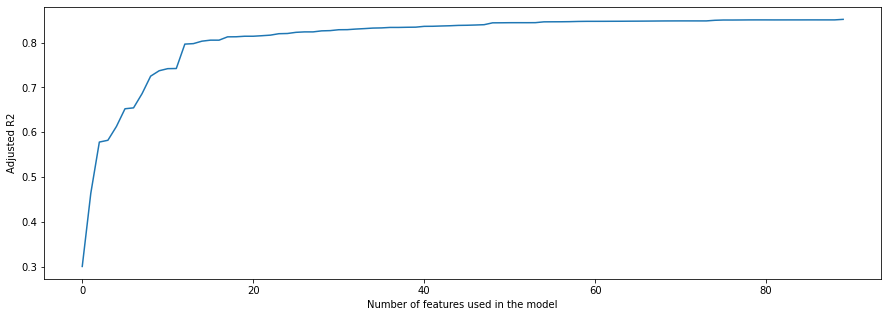

In [273]:
## Plotting the Adjusted R2 for different number of features used in the model
Adj_r2 = iter_RFE(X_train_sc_m, y_train, 7.4)
plt.plot(Adj_r2)
plt.xlabel('Number of features used in the model')
plt.ylabel('Adjusted R2');

print('Max Adjususted R2 : %.3f' %np.max(Adj_r2))
print('Number of features that resulted in max Adjusted R2 : ', np.argmax(Adj_r2))

In [274]:
Adj_r2[45]

0.838988077035017

**Obervations**
- While running the RFE recursively for differnt "n_features_to_select" values we find AdjR2 is highest (0.852) at 90 feaures, however, the half the number of parameters the (45 features) we still get AdjR2 close to 84% which is considerble considering the reduction in number of features. 

- Will tray to Run RFE for 45 features then do the fine feature selection based on p-value and VIF

In [275]:
## Fitting the model with RFE method

rdg_rfe = RFE(Ridge(alpha=7.4), n_features_to_select=45)
rdg_rfe.fit(X_train_sc_m, y_train)


RFE(estimator=Ridge(alpha=7.4), n_features_to_select=45)

In [292]:
## listing the feature importance 
list(zip(X_train_sc_m.columns, rdg_rfe.support_, rdg_rfe.ranking_))

[('MSSubClass_m_120', False, 17),
 ('MSSubClass_m_160', True, 1),
 ('MSSubClass_m_20-70-75-85', True, 1),
 ('MSSubClass_m_30-45-180', False, 29),
 ('MSSubClass_m_40-60', True, 1),
 ('MSSubClass_m_50-90-190', True, 1),
 ('MSZonins_m_RL', False, 23),
 ('MSZonins_m_RM-RH-C', True, 1),
 ('LotShape_m_Reg', False, 24),
 ('LandContour_m_Low-HLS', True, 1),
 ('LandContour_m_Lvl', True, 1),
 ('LotConfig_m_FR3-CulDSac', True, 1),
 ('LotConfig_m_Inside', False, 44),
 ('LandSlope_m_Mod-Sev', True, 1),
 ('Neighborhood_m_Bl-Sa-SW-NW-NP-Mi', True, 1),
 ('Neighborhood_m_BrD-ID-Me', True, 1),
 ('Neighborhood_m_BrK-Ed-OT', True, 1),
 ('Neighborhood_m_Cl-Cr-Co', True, 1),
 ('Neighborhood_m_SawyerW', True, 1),
 ('Neighborhood_m_St-Nr-No', True, 1),
 ('Neighborhood_m_Ve-Ti-So', True, 1),
 ('Condition1_m_Feedr-RRAe', False, 33),
 ('Condition1_m_Norm', True, 1),
 ('Condition1_m_PosN-PosA-RRNn-RRNe', True, 1),
 ('Condition1_m_RRAn', False, 21),
 ('MasVnrType_m_BrkFace', False, 4),
 ('MasVnrType_m_Stone', Fals

In [294]:
## listing the 45 features that are selected for the modeling 
list(zip(X_train_sc_m.columns[rdg_rfe.support_], rdg_rfe.ranking_[[rdg_rfe.support_]]))

[('MSSubClass_m_160', 1),
 ('MSSubClass_m_20-70-75-85', 1),
 ('MSSubClass_m_40-60', 1),
 ('MSSubClass_m_50-90-190', 1),
 ('MSZonins_m_RM-RH-C', 1),
 ('LandContour_m_Low-HLS', 1),
 ('LandContour_m_Lvl', 1),
 ('LotConfig_m_FR3-CulDSac', 1),
 ('LandSlope_m_Mod-Sev', 1),
 ('Neighborhood_m_Bl-Sa-SW-NW-NP-Mi', 1),
 ('Neighborhood_m_BrD-ID-Me', 1),
 ('Neighborhood_m_BrK-Ed-OT', 1),
 ('Neighborhood_m_Cl-Cr-Co', 1),
 ('Neighborhood_m_SawyerW', 1),
 ('Neighborhood_m_St-Nr-No', 1),
 ('Neighborhood_m_Ve-Ti-So', 1),
 ('Condition1_m_Norm', 1),
 ('Condition1_m_PosN-PosA-RRNn-RRNe', 1),
 ('BldgType_m_Duplex-2fmCon', 1),
 ('BldgType_m_Twnhs', 1),
 ('BldgType_m_TwnhsE', 1),
 ('RoofStyle_m_Others', 1),
 ('Exterior1st_m_HdBoard', 1),
 ('Exterior1st_m_Plywood', 1),
 ('Exterior1st_m_VinylSd', 1),
 ('Exterior1st_m_Wd S-MS-St', 1),
 ('Exterior1st_m_WdS-AspS-CB-AsbS-BrkC', 1),
 ('Foundation_m_Slab', 1),
 ('BsmtQual_m', 1),
 ('KitchenQual_m', 1),
 ('OverallQual', 1),
 ('Remodeled_YoN', 1),
 ('AgeRemod@Sale', 1)

In [278]:
## using the 45 features selected in RFE method to build the model

rfe_cols = X_train_sc_m.columns[rdg_rfe.support_]

X_train_rfe = X_train_sc_m[rfe_cols]
X_test_rfe = X_test_sc_m[rfe_cols]

rdg = Ridge(alpha=7.4)

rdg.fit(X_train_rfe, y_train)

## Checking the model performance on test data
y_train_pred = rdg.predict(X_train_rfe)
y_test_pred = rdg.predict(X_test_rfe)

ntr = X_train_rfe.shape[0]
ntt = X_test_rfe.shape[0]
p = X_train_rfe.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)


Train Adjusted R-Squared : 0.845
Test Adjusted R-Squared : 0.828


Train RMSE : 23045.39
Test RMSE : 21301.31


**Observation**
- The variance has been considerablly reduced compated to all features model
- We will explore Lasso to check how the performance changes

In [279]:
names = rdg.feature_names_in_
names = names.reshape(47,1)

In [280]:
co_efs = rdg.coef_
co_efs = co_efs.reshape(47, 1)

In [281]:
imp_features = pd.DataFrame(np.hstack([names, co_efs]), columns=['features', 'co-eff'])
imp_features.sort_values(by = 'co-eff', ascending=False, inplace=True)
imp_features

features        co-eff
46                            TotalBath  34518.939356
14              Neighborhood_m_St-Nr-No  33705.777691
45                             TotalSFT  33457.133406
37                         TotRmsAbvGrd  29832.917442
38                           Fireplaces  28123.213882
39                           GarageCars  22157.932126
40                           GarageArea  20744.746304
15              Neighborhood_m_Ve-Ti-So  18385.803696
41                           WoodDeckSF  15610.013319
35                           BsmtFinSF1  13810.052517
30                          OverallQual  13628.832844
36                         BedroomAbvGr  13484.570319
42                          OpenPorchSF  12275.166625
8                   LandSlope_m_Mod-Sev  11584.929433
5                 LandContour_m_Low-HLS  11330.018509
17     Condition1_m_PosN-PosA-RRNn-RRNe  10185.862003
2                    MSSubClass_m_40-60   9146.611192
12              Neighborhood_m_Cl-Cr-Co   8358.575643
31                        Remodeled_YoN    8242.76982
29                        KitchenQual_m   8185.190614
34                              LotArea   7926.117844
16                    Condition1_m_Norm   7842.134771
6                     LandContour_m_Lvl   7254.706158
7               LotConfig_m_FR3-CulDSac   7133.596566
1              MSSubClass_m_20-70-75-85   6982.005853
3                MSSubClass_m_50-90-190   6543.828444
27                    Foundation_m_Slab   5594.024535
28                           BsmtQual_m   5460.038056
13               Neighborhood_m_SawyerW   5440.706101
21                   RoofStyle_m_Others   5052.571528
32                        AgeRemod@Sale   -3110.99824
33                        AgeRemod@Sale   -3110.99824
44                        AgeRemod@Sale   -3110.99824
43                        AgeRemod@Sale   -3110.99824
18             BldgType_m_Duplex-2fmCon  -5418.809197
20                    BldgType_m_TwnhsE  -5926.237681
9      Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  -5945.956516
23                Exterior1st_m_Plywood   -6989.08844
10             Neighborhood_m_BrD-ID-Me  -8176.339078
4                    MSZonins_m_RM-RH-C  -8188.250617
11             Neighborhood_m_BrK-Ed-OT  -8201.498603
24                Exterior1st_m_VinylSd  -9551.692374
19                     BldgType_m_Twnhs  -9932.578336
25             Exterior1st_m_Wd S-MS-St -11798.758634
0                      MSSubClass_m_160 -13412.115757
26  Exterior1st_m_WdS-AspS-CB-AsbS-BrkC -15316.814798
22                Exterior1st_m_HdBoard -15954.713003

- Top 10 features that influences the housing price are;
    - Total Bath Rooms
    - Neighborhood belonging to - StoneBr, NridgHt, NoRidge 
    - Total SFT of the house
    - Total rooms above grade
    - Number of fireplaces
    - GarageArea
    - Neighborhood belonging to - Veenker, Timberland, Somerset
    - Wood deck area in square feet
    - Basement Type 1 finished square feet
    - Overall Quality

### Building Lass Model

In [282]:
## First Lasso Model on Category Modified Data

laso = Lasso(alpha=1)

laso.fit(X_train_sc_m, y_train)

Lasso(alpha=1)

In [283]:
## Checking the model performance on test data
y_train_pred = laso.predict(X_train_sc_m)
y_test_pred = laso.predict(X_test_sc_m)

ntr = X_train_sc_m.shape[0]
ntt = X_test_sc_m.shape[0]
p = X_train_sc_m.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.869
Test Adjusted R-Squared : 0.817


Train RMSE : 20767.44
Test RMSE : 19864.22


**Observations**
- The performance of the model close to the first Ridge Model and there is some varience in the data
- We will tune the alpa value and,
- We will use the features extracted using RFE technique to train a Lasso Model

### Hyper-parameter Search using GridSearchCV 

In [284]:
est = Lasso()
param = {'alpha': [0.01, .1, 1, 10, 50, 100, 200, 300, 500, 1000]}
# param = {'alpha': np.logspace(-1, 2.5, 300)}
# score = make_scorer()

In [285]:
## Running Grid Search
grid_search = GridSearchCV(est, param_grid=param, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_sc_m, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 200}
0.8206195103694066


In [286]:
## Running with Best alpha value found from Grid Search

laso = Lasso(alpha=200)

laso.fit(X_train_sc_m, y_train)

## Checking the model performance on test data
y_train_pred = laso.predict(X_train_sc_m)
y_test_pred = laso.predict(X_test_sc_m)

ntr = X_train_sc_m.shape[0]
ntt = X_test_sc_m.shape[0]
p = X_train_sc_m.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)

Train Adjusted R-Squared : 0.846
Test Adjusted R-Squared : 0.811


Train RMSE : 22510.94
Test RMSE : 20160.87


**Observation**
- At alpha = 200, there is a considerable reduction in Varaince of the Model

In [287]:
## using the 45 features selected in RFE method to build the model

rfe_cols = X_train_sc_m.columns[rdg_rfe.support_]

X_train_rfe = X_train_sc_m[rfe_cols]
X_test_rfe = X_test_sc_m[rfe_cols]

laso = Lasso(alpha=200)

laso.fit(X_train_rfe, y_train)

## Checking the model performance on test data
y_train_pred = laso.predict(X_train_rfe)
y_test_pred = laso.predict(X_test_rfe)

ntr = X_train_rfe.shape[0]
ntt = X_test_rfe.shape[0]
p = X_train_rfe.shape[1]

## Computing Adjusted R2 for Train data
R2_train = r2_score(y_train, y_train_pred)
Adj_R2_train = 1 - (1-R2_train) * (ntr-1)/(ntr-p-1)

## Computing Adjusted R2 for Test data
R2_test = r2_score(y_test, y_test_pred)
Adj_R2_test = 1 - (1-R2_test) * (ntt-1)/(ntt-p-1)

## Computing RMSE Values for Train and Test data
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Train Adjusted R-Squared : %.3f" %Adj_R2_train)
print("Test Adjusted R-Squared : %.3f" %Adj_R2_test)
print('\n')
print("Train RMSE : %.2f" %RMSE_train)
print("Test RMSE : %.2f" %RMSE_test)


Train Adjusted R-Squared : 0.840
Test Adjusted R-Squared : 0.827


Train RMSE : 23432.55
Test RMSE : 21377.35


In [288]:
names_l = laso.feature_names_in_
names_l = names.reshape(47,1)

In [289]:
co_efs_l = laso.coef_
co_efs_l = co_efs.reshape(47, 1)

In [290]:
imp_features_l = pd.DataFrame(np.hstack([names_l, co_efs_l]), columns=['features', 'co-eff'])
imp_features_l.sort_values(by = 'co-eff', ascending=False, inplace=True)
imp_features_l

features        co-eff
46                            TotalBath  34518.939356
14              Neighborhood_m_St-Nr-No  33705.777691
45                             TotalSFT  33457.133406
37                         TotRmsAbvGrd  29832.917442
38                           Fireplaces  28123.213882
39                           GarageCars  22157.932126
40                           GarageArea  20744.746304
15              Neighborhood_m_Ve-Ti-So  18385.803696
41                           WoodDeckSF  15610.013319
35                           BsmtFinSF1  13810.052517
30                          OverallQual  13628.832844
36                         BedroomAbvGr  13484.570319
42                          OpenPorchSF  12275.166625
8                   LandSlope_m_Mod-Sev  11584.929433
5                 LandContour_m_Low-HLS  11330.018509
17     Condition1_m_PosN-PosA-RRNn-RRNe  10185.862003
2                    MSSubClass_m_40-60   9146.611192
12              Neighborhood_m_Cl-Cr-Co   8358.575643
31                        Remodeled_YoN    8242.76982
29                        KitchenQual_m   8185.190614
34                              LotArea   7926.117844
16                    Condition1_m_Norm   7842.134771
6                     LandContour_m_Lvl   7254.706158
7               LotConfig_m_FR3-CulDSac   7133.596566
1              MSSubClass_m_20-70-75-85   6982.005853
3                MSSubClass_m_50-90-190   6543.828444
27                    Foundation_m_Slab   5594.024535
28                           BsmtQual_m   5460.038056
13               Neighborhood_m_SawyerW   5440.706101
21                   RoofStyle_m_Others   5052.571528
32                        AgeRemod@Sale   -3110.99824
33                        AgeRemod@Sale   -3110.99824
44                        AgeRemod@Sale   -3110.99824
43                        AgeRemod@Sale   -3110.99824
18             BldgType_m_Duplex-2fmCon  -5418.809197
20                    BldgType_m_TwnhsE  -5926.237681
9      Neighborhood_m_Bl-Sa-SW-NW-NP-Mi  -5945.956516
23                Exterior1st_m_Plywood   -6989.08844
10             Neighborhood_m_BrD-ID-Me  -8176.339078
4                    MSZonins_m_RM-RH-C  -8188.250617
11             Neighborhood_m_BrK-Ed-OT  -8201.498603
24                Exterior1st_m_VinylSd  -9551.692374
19                     BldgType_m_Twnhs  -9932.578336
25             Exterior1st_m_Wd S-MS-St -11798.758634
0                      MSSubClass_m_160 -13412.115757
26  Exterior1st_m_WdS-AspS-CB-AsbS-BrkC -15316.814798
22                Exterior1st_m_HdBoard -15954.713003

**Obsrvation**
- Feature selected through REF has yielded the best result so far for both RIDGE and LASSO Regression, with considerable reduction on variance
- The top 10 important features obtained based on the co-efficient values are similar for LASSO and RIDGE

## Conclusion

- The Feature Engineering interms of Recategorising the Nominal Categorical variables based on the class wise independence has resulted in optimizing on the categories for each feaure and also improve the model predicion power and lower the variance
- The approach has resulted in total of 90 features for the modeling
- Numerical features were selected based on Co-relation it has with Target Variable 
- RFE method was used to reduce the number of features to half 45/90(in the final model) which has give a good model with low variance
- Both Ridge and Lasso performed to the same level after tuning the alpha value (alpha = 7.4 for Ridge and 200 for Lasso)
- The perforamcen in terms of Adjusted R2;
    - Ridge - Train = 0.845, Ridge Test = 0.828
    - Lasso - Train = 0.84, Lasso Test = 0.827
    
- **Model Interpretation**
- Top 10 features;
    - Total Bath Rooms
    - Neighborhood belonging to - StoneBr, NridgHt, NoRidge 
    - Total SFT of the house
    - Total rooms above grade
    - Number of fireplaces
    - GarageArea
    - Neighborhood belonging to - Veenker, Timberland, Somerset
    - Wood deck area in square feet
    - Basement Type 1 finished square feet
    - Overall Quality